# Building Optimization


## Load and Visualize the Data
First, import the modules we will need.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:

from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from seaborn import axes_style
import seaborn.objects as so

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as mtick
import matplotlib as mpl

### Creating global parameters that will be applied to all graphs and outputs

In [3]:
## Note that font.size controls default text sizes.  To configure
## special text sizes tick labels, axes, labels, title, etc., see the rc
## settings for axes and ticks.  Special text sizes can be defined
## relative to font.size, using the following values: xx-small, x-small,
## small, medium, large, x-large, xx-large, larger, or smaller

#font.family:  sans-serif
#font.style:   normal  normal, italic oblique
#font.variant: normal  normal, small-caps
#font.weight:  normal  bold, heavy, light, ultrabold ultralight
#font.stretch: normal
#font.size:    10.0

In [4]:
sns.set_theme(style='whitegrid')


In [5]:
#plt.rc('font', weight ='normal')

fig = plt.figure(figsize=(12,6), dpi=150)

plt.rc('legend', loc="upper right", framealpha=0.8, fontsize=12,title_fontsize=12)

plt.rc('axes', grid=True, titlelocation='center', titleweight='normal',
       titlesize=18,titlecolor='auto', titley=None, titlepad=12, 
       labelsize=14, labelpad=2, labelweight='normal', labelcolor='black',
      edgecolor='#b0b0b0', linewidth=0.5)
    
plt.rc('lines', linewidth=0.8)
plt.rc('grid', color="#b0b0b0", linewidth=0.5, alpha=0.8)

plt.rc('axes.grid', axis='y')

# 'axes.grid': True,
#           'axes.grid.axis': 'both',
#           'axes.grid.which': 'major',
#           'axes.labelcolor': '#555555',
#           'axes.labelpad': 4.0,
#           'axes.labelsize': 'large',
#           'axes.labelweight': 'normal',
#           'axes.linewidth': 1.0,

plt.rc('xtick', labelsize=14, color='black')
plt.rc('ytick', labelsize=14)
#plt.rc('font', size=11)


plt.rcParams['xtick.major.pad']=-2
plt.rcParams['ytick.major.pad']=-2

 # 'axes.formatter.useoffset': True,
 #          'axes.grid': True,
 #          'axes.grid.axis': 'both',
 #          'axes.grid.which': 'major',

<Figure size 1800x900 with 0 Axes>

In [6]:
sns.set_palette("Set2")

In [7]:
import seaborn as sns
import matplotlib.colors as mcolors

# Get the "Set2" palette
palette = sns.color_palette("Set2")


In [8]:
heat = '#fc8d62'
heat_l = '#7e4631'


In [9]:
cold = '#8da0cb'
cold_l = '#546079'

In [10]:

column_mapping = {
    "X1": "Compactness",
    "X2": "Surface Area",
    "X3": "Wall Area",
    "X4": "Roof Area",
    "X5": "Height",
    "X6": "Orientation",
    "X7": "Glazing Area",
    "X8": "Glazing Distribution",
    "Y1": "Heating Load",
    "Y2": "Cooling Load"
}



## Data Load

In [11]:
data = pd.read_excel(r"C:\Users\GalczakA\Downloads\ENB2012_data.xlsx", header=0)

In [12]:
building_data_labeled = data.rename(columns=column_mapping)


In [13]:
building_data_labeled

Compactness  Surface Area  Wall Area  Roof Area  Height  Orientation  \
0           0.98         514.5      294.0     110.25     7.0            2   
1           0.98         514.5      294.0     110.25     7.0            3   
2           0.98         514.5      294.0     110.25     7.0            4   
3           0.98         514.5      294.0     110.25     7.0            5   
4           0.90         563.5      318.5     122.50     7.0            2   
..           ...           ...        ...        ...     ...          ...   
763         0.64         784.0      343.0     220.50     3.5            5   
764         0.62         808.5      367.5     220.50     3.5            2   
765         0.62         808.5      367.5     220.50     3.5            3   
766         0.62         808.5      367.5     220.50     3.5            4   
767         0.62         808.5      367.5     220.50     3.5            5   

     Glazing Area  Glazing Distribution  Heating Load  Cooling Load  
0             0.0                     0         15.55         21.33  
1             0.0                     0         15.55         21.33  
2             0.0                     0         15.55         21.33  
3             0.0                     0         15.55         21.33  
4             0.0                     0         20.84         28.28  
..            ...                   ...           ...           ...  
763           0.4                     5         17.88         21.40  
764           0.4                     5         16.54         16.88  
765           0.4                     5         16.44         17.11  
766           0.4                     5         16.48         16.61  
767           0.4                     5         16.64         16.03  

[768 rows x 10 columns]

In [14]:
distribution_of_features = building_data_labeled.iloc[:,0:8]

In [15]:
optimal_bins = int(np.sqrt(len(distribution_of_features)))  


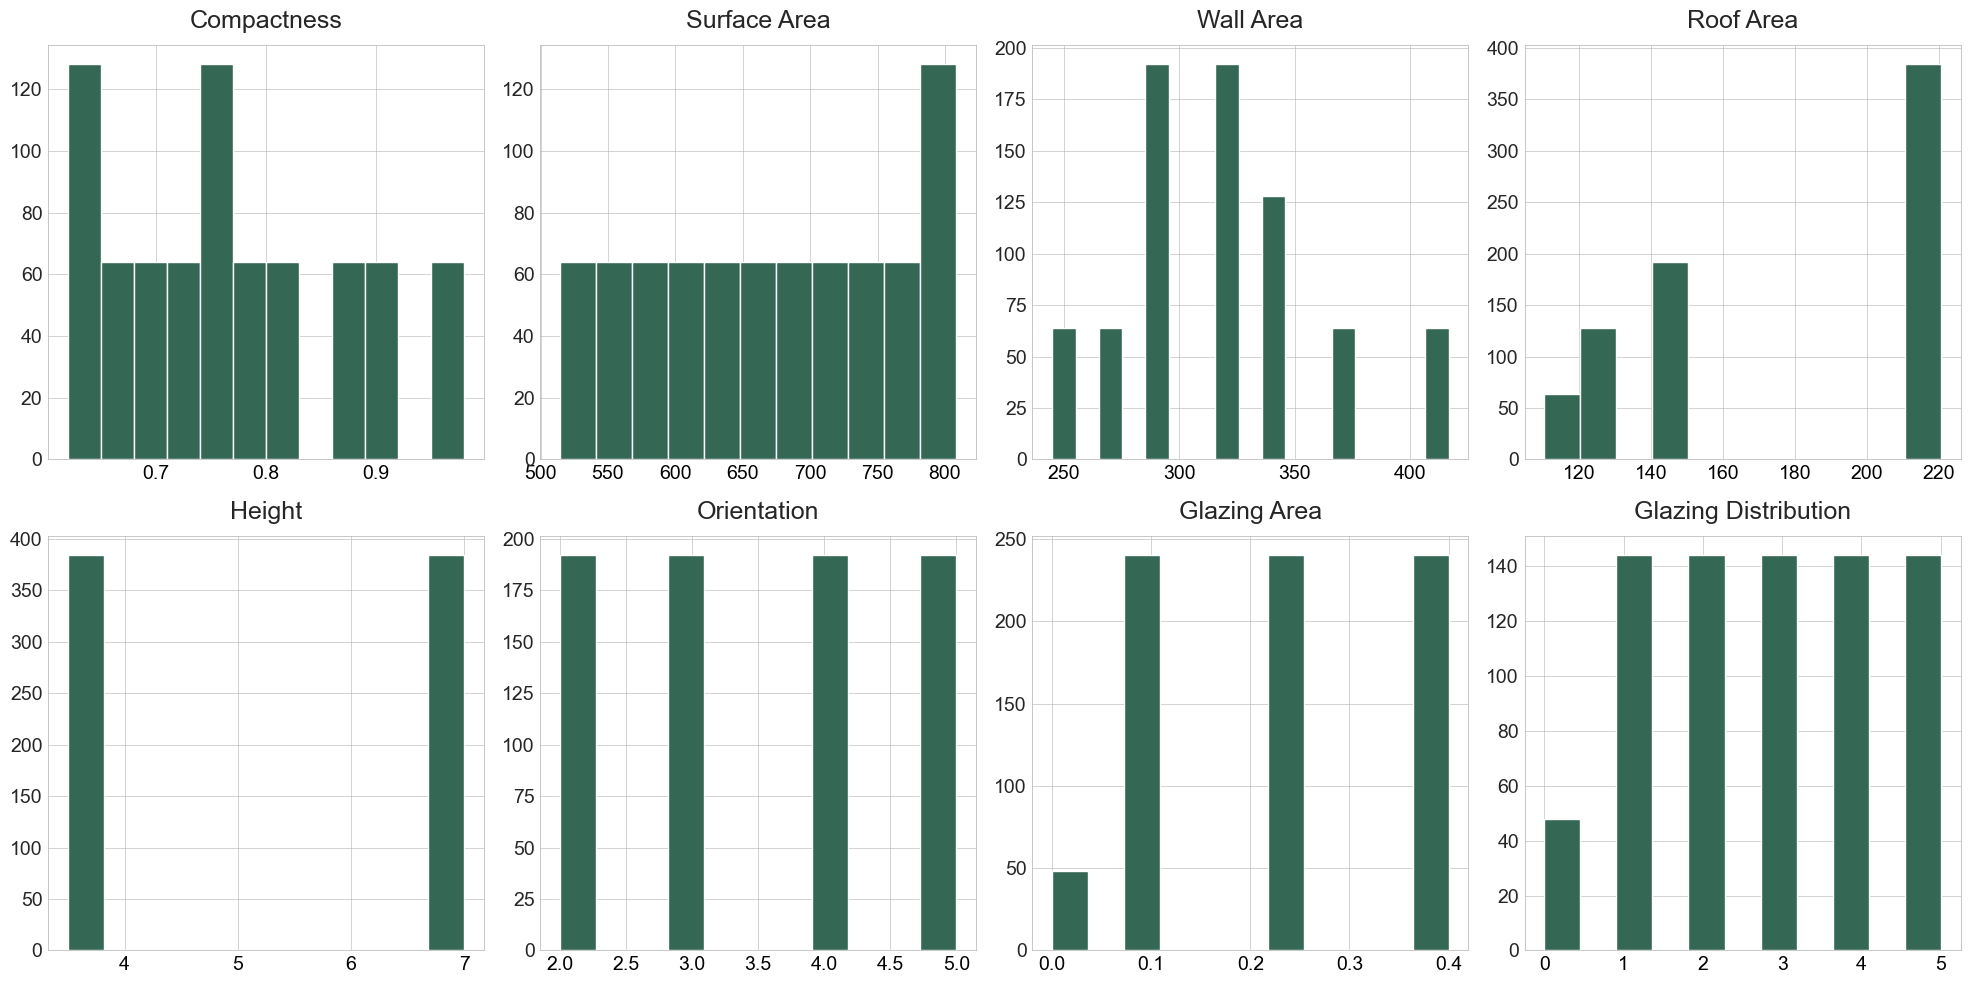

In [16]:
# Create a figure and axes with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10)) 

# Iterate over columns and plot each histogram in its respective subplot
for i, column in enumerate(distribution_of_features.columns):
    row = i // 4 
    col = i % 4   
    distribution_of_features[column].hist(ax=axes[row, col], color='#356854', bins="auto")
    axes[row, col].set_title(column)  
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

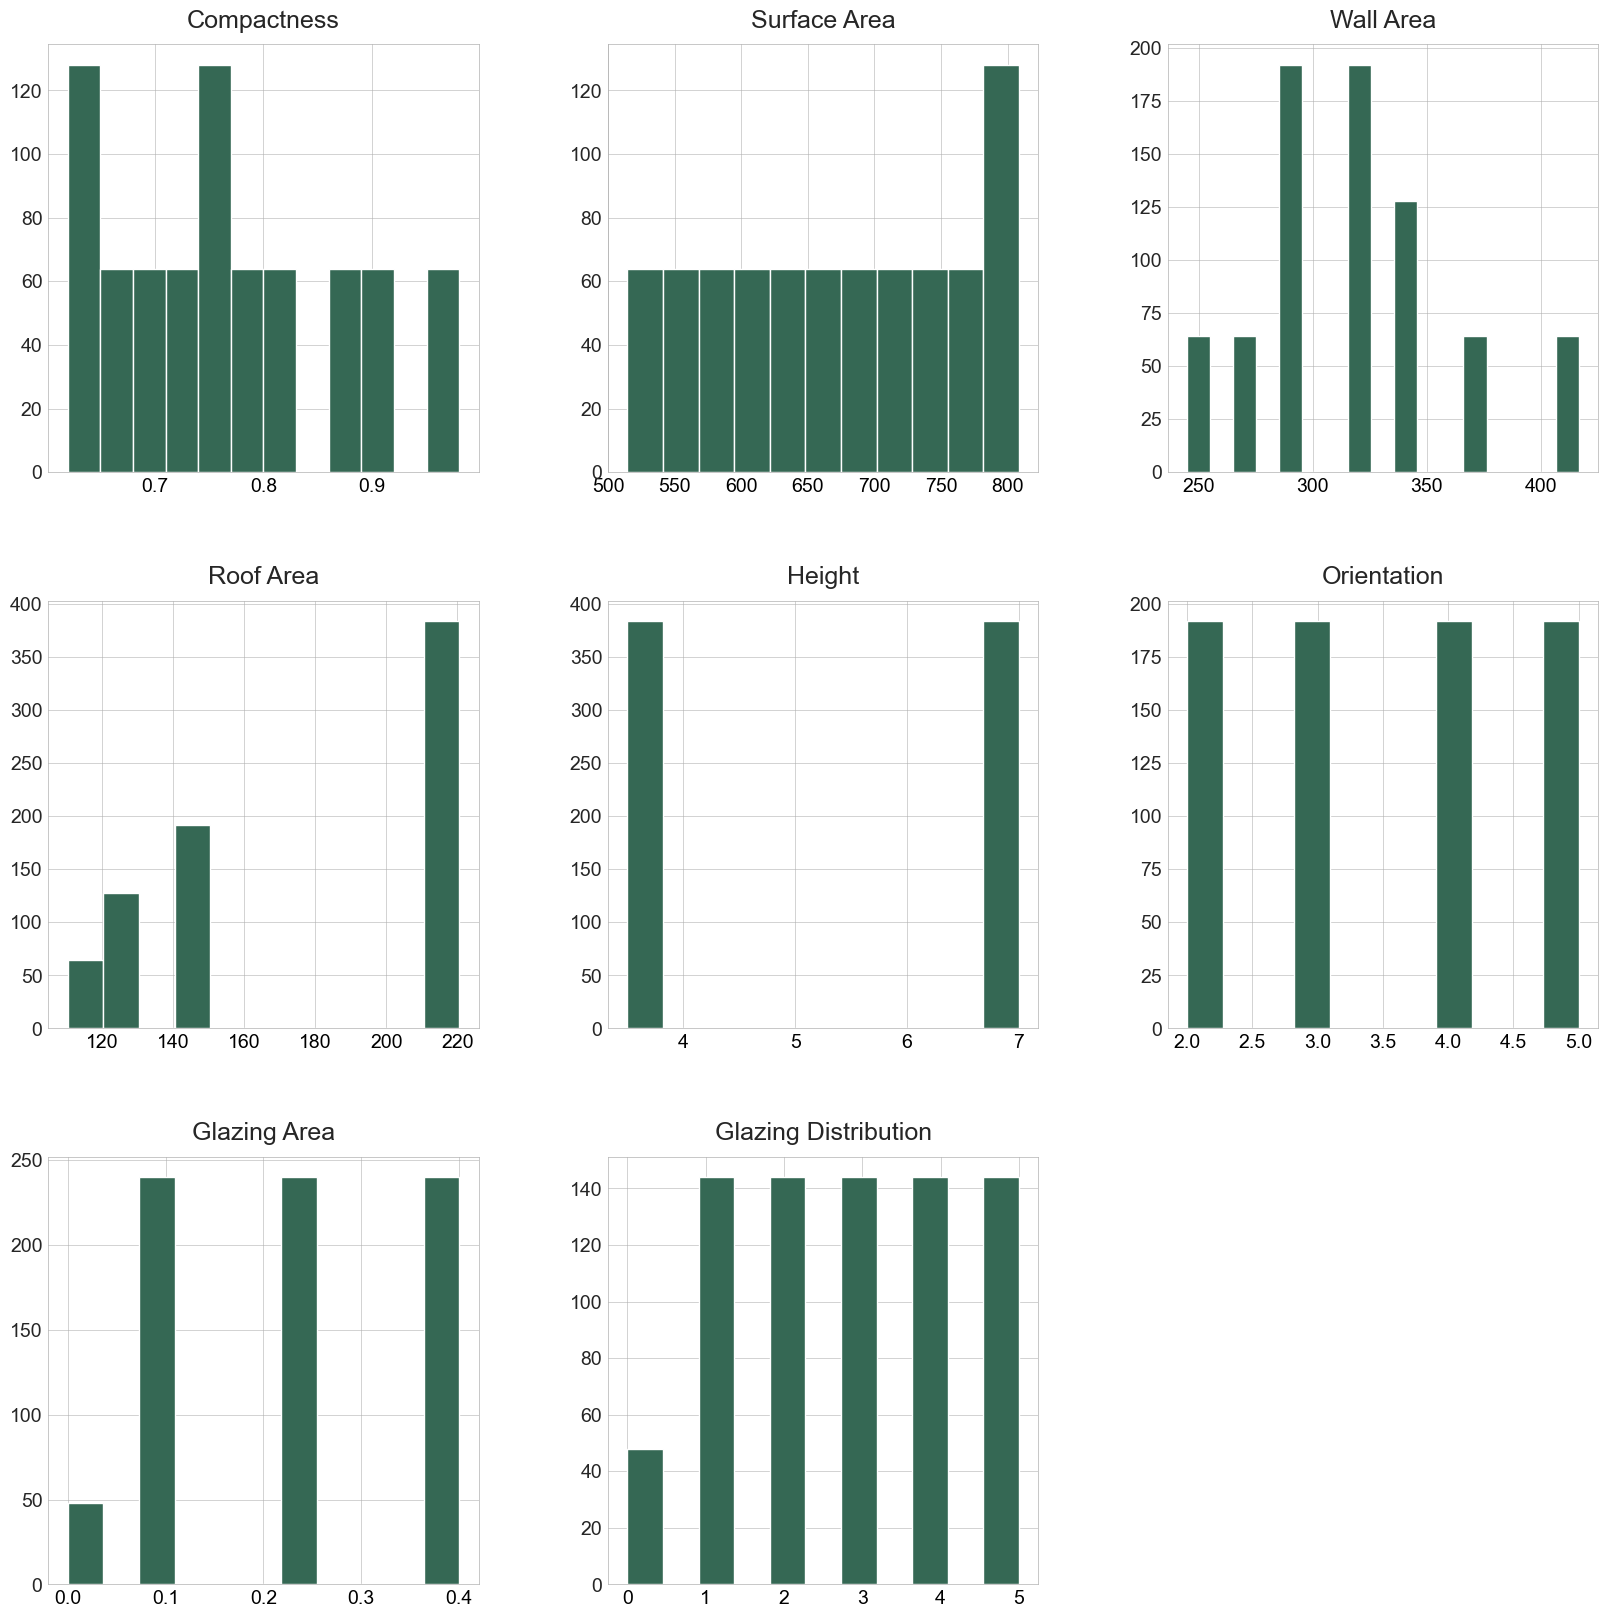

In [17]:

distribution_of_features.hist(figsize = (20,20), color='#356854', bins="auto")

plt.show()

In [18]:
#creating empty dataframe that will store results
results_df = pd.DataFrame(columns=['Algorithm','Feature Scaling','Degree', 'Alpha','R²-Test','R²-Train',  
                'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'])
results_df

Empty DataFrame
Columns: [Algorithm, Feature Scaling, Degree, Alpha, R²-Test, R²-Train, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)]
Index: []

## Lin Regression - original data set 80/20 split

In [19]:
# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1", "Y2"]]  # Predicting both Heating & Cooling Load

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
def model_lin(X_train, X_test, Y_train, Y_test, ML, ML_label, degree_label, alpha_label, scaling):
    # Initialize and train linear regression model
    model = ML
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    
    # Evaluate Model Performance
    r2 = r2_score(Y_test, Y_pred)
    r2_train = r2_score(Y_train, Y_pred_train)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    new_row = ({'Algorithm': [ML_label],'Feature Scaling':scaling,'Degree': degree_label,
                'Alpha': alpha_label,'R²-Test': [r2],'R²-Train': [r2_train], 
                'Mean Absolute Error (MAE)': [mae], 'Root Mean Squared Error (RMSE)': [rmse]})
    
    # Print Evaluation Metrics
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
    # Sample actual vs predicted values for two target variables
    y_actual = Y_test.to_numpy()  # Actual values (2 targets)
    y_predicted = Y_pred.copy()  # Predicted values (2 targets)
    
    # Convert lists
    y_actual = list(zip(*y_actual)) 
    y_predicted = list(zip(*y_predicted)) 
    
 
    plt.figure(figsize=(6, 6))
    plt.bar(["Train R²", "Test R²"], [r2_train, r2], color=['blue', 'orange'])
    plt.ylabel("R² Score")
    plt.title(f"Model Performance ({ML_label}, Alpha={alpha_label})")
    plt.ylim(0, 1)  
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_test, Y_test - Y_pred, color='red', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot ({ML_label})")
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.hist(Y_test - Y_pred, bins=20,  alpha=0.7)
    plt.xlabel("Residuals (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({ML_label})")
    plt.show()
    
    plt.figure(figsize=(6, 12))
    # First target variable plot
    plt.subplot(2, 1, 1)
    plt.scatter(y_actual[0], y_predicted[0], color=heat, label="Test Data")
    plt.plot(y_actual[0], y_actual[0], color=heat_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Heating Load (Tons)")
    plt.legend(loc="lower right")
    
    # Second target variable plot
    plt.subplot(2, 1, 2)
    plt.scatter(y_actual[1], y_predicted[1], color=cold, label="Test Data")
    plt.plot(y_actual[1], y_actual[1], color=cold_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.ylabel("Predicted")
    plt.title("Cooling Load (Tons)")
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return new_row

R² Score: 0.9024
Mean Absolute Error (MAE): 2.1945
Mean Squared Error (MSE): 9.5513
Root Mean Squared Error (RMSE): 3.0905


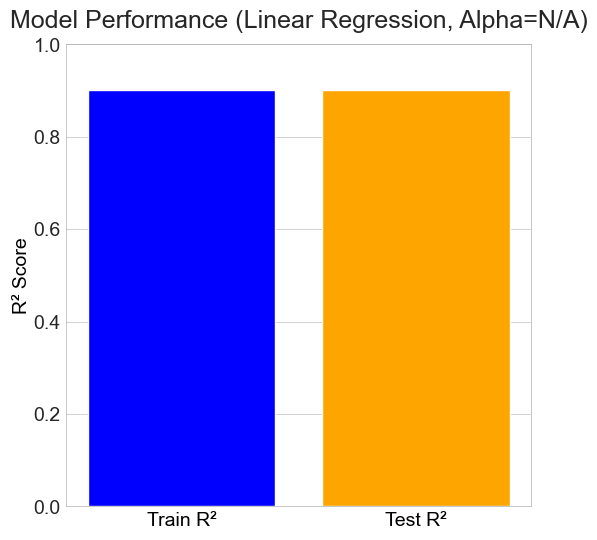

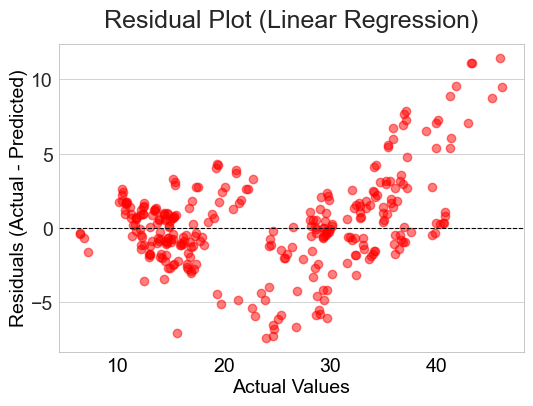

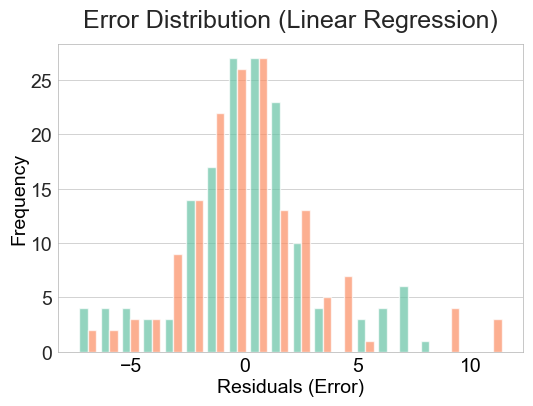

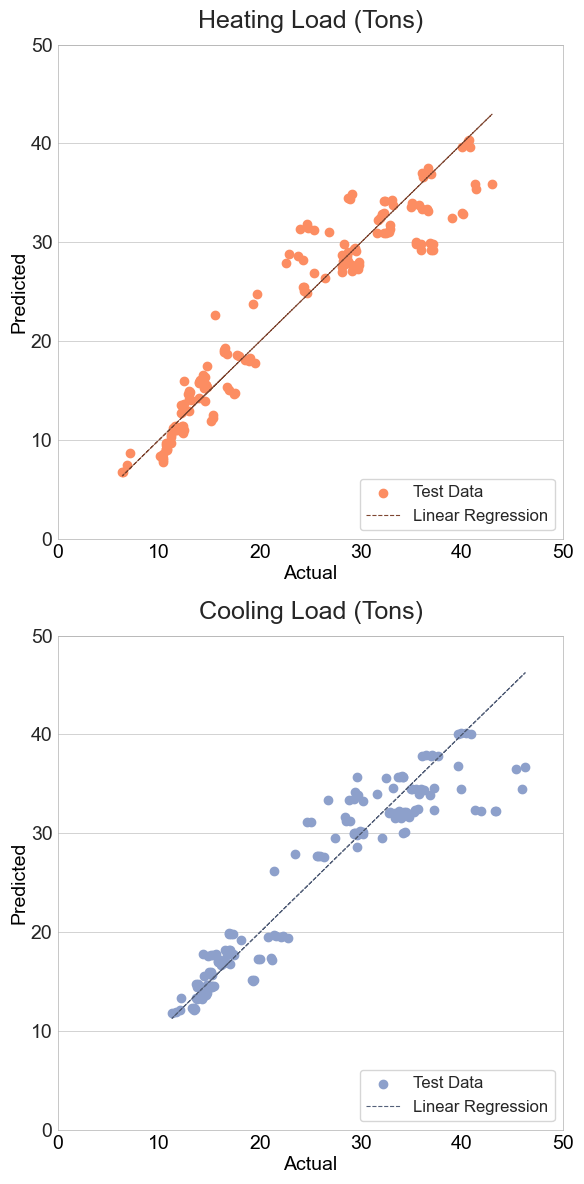

In [21]:
lin_reg1 = model_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label="N/A", alpha_label="N/A", scaling="N/A")

In [22]:
results_df = pd.concat([results_df,pd.DataFrame(lin_reg1)]) #concatenating function results to results dataframe

C:\Users\GalczakA\AppData\Local\Temp\ipykernel_13924\2327438586.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df,pd.DataFrame(lin_reg1)]) #concatenating function results to results dataframe


## Lin Regression - Min Max Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler 

# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1", "Y2"]]  # Predicting both Heating & Cooling Load

# Normalize features (X)
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

R² Score: 0.9027
Mean Absolute Error (MAE): 2.1895
Mean Squared Error (MSE): 9.5240
Root Mean Squared Error (RMSE): 3.0861


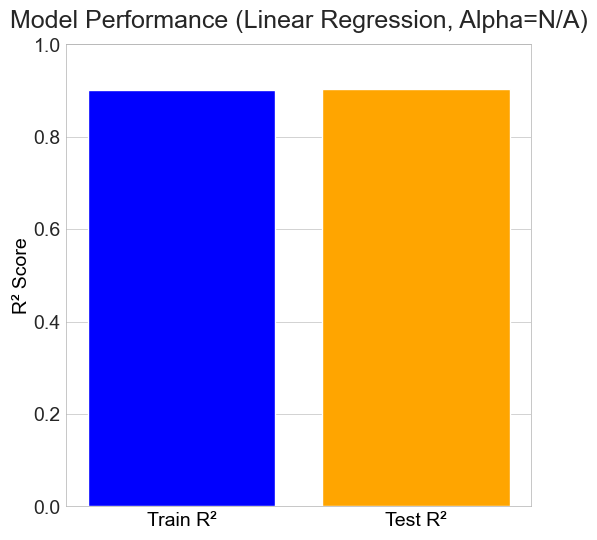

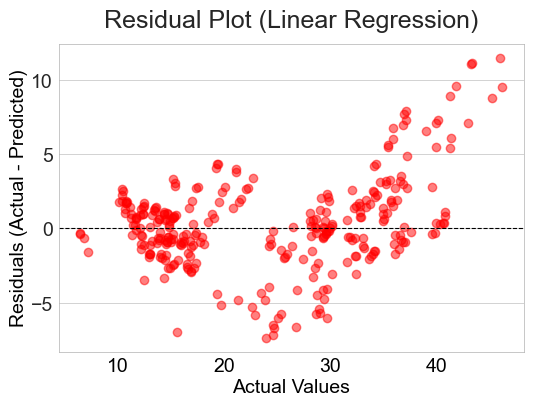

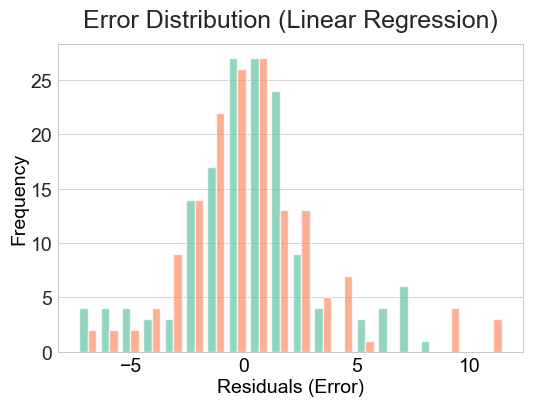

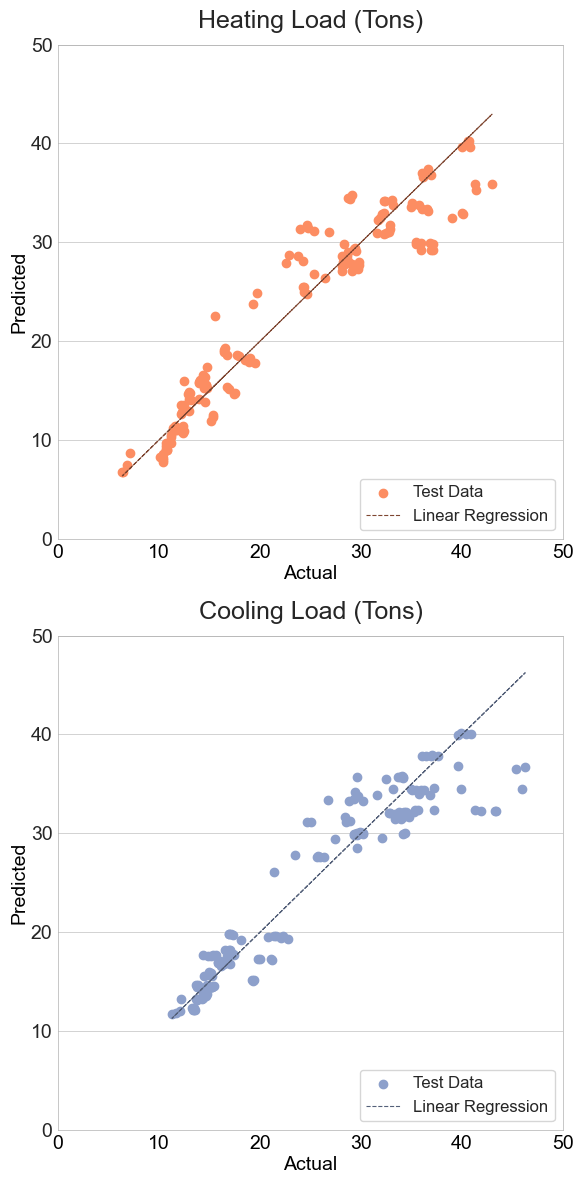

In [24]:
lin_reg_minmax = model_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label="N/A", alpha_label="N/A", scaling="MinMax Scaler")

In [25]:
results_df = pd.concat([results_df,pd.DataFrame(lin_reg_minmax)]) #concatenating function results to results dataframe

In [26]:
results_df

Algorithm Feature Scaling Degree Alpha   R²-Test  R²-Train  \
0  Linear Regression             N/A    N/A   N/A  0.902441  0.901032   
0  Linear Regression   MinMax Scaler    N/A   N/A  0.902702  0.901495   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  
0                   2.194482                        3.090519  
0                   2.189464                        3.086095

## Lin Regression - Standard Scaler

In [27]:

from sklearn.preprocessing import StandardScaler  #

# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1", "Y2"]]  # Predicting both Heating & Cooling Load

# Normalize features (X)
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)




R² Score: 0.9027
Mean Absolute Error (MAE): 2.1887
Mean Squared Error (MSE): 9.5233
Root Mean Squared Error (RMSE): 3.0860


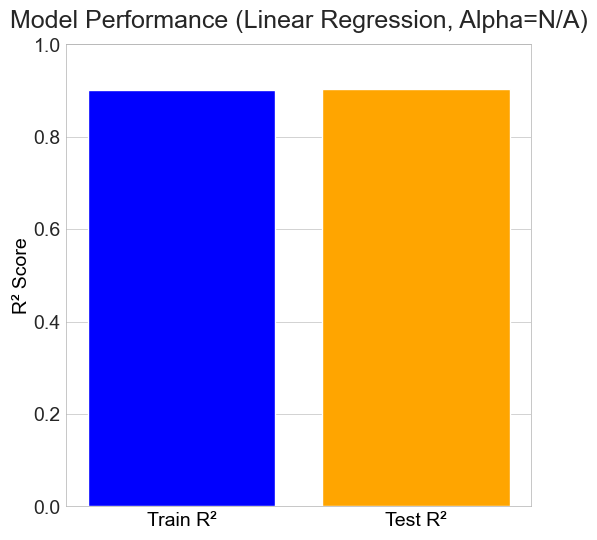

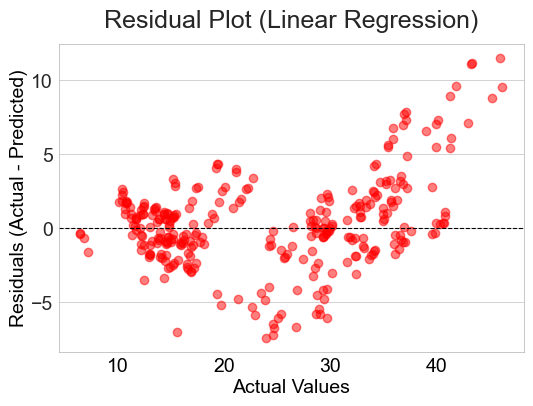

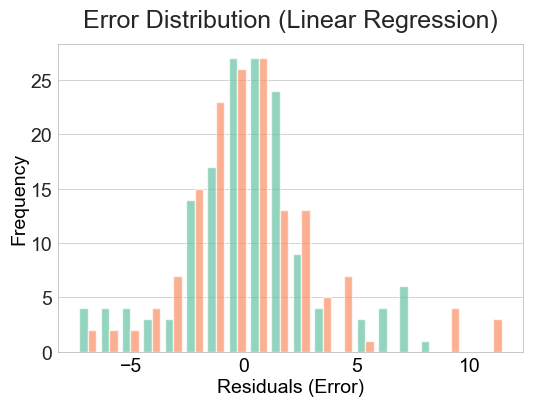

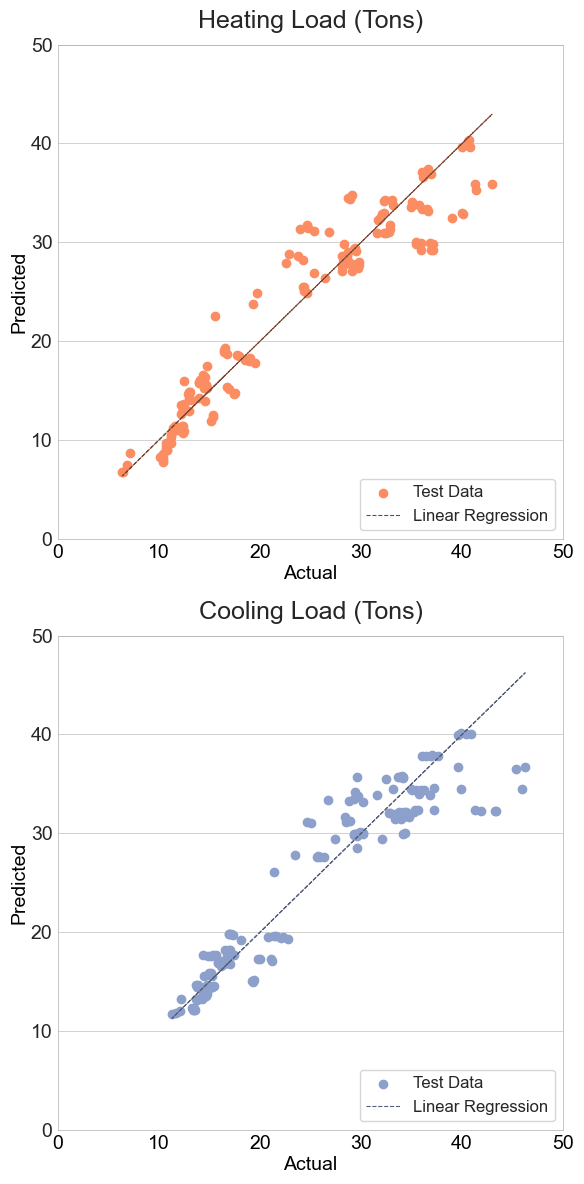

In [28]:
lin_reg_standard = model_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label="N/A", alpha_label="N/A", scaling="Standard Scaler")

In [29]:
results_df = pd.concat([results_df,pd.DataFrame(lin_reg_standard)]) #concatenating function results to results dataframe

In [30]:
results_df

Algorithm  Feature Scaling Degree Alpha   R²-Test  R²-Train  \
0  Linear Regression              N/A    N/A   N/A  0.902441  0.901032   
0  Linear Regression    MinMax Scaler    N/A   N/A  0.902702  0.901495   
0  Linear Regression  Standard Scaler    N/A   N/A  0.902705  0.901493   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  
0                   2.194482                        3.090519  
0                   2.189464                        3.086095  
0                   2.188684                        3.085987

## Polynomial Regression - choosing best degree

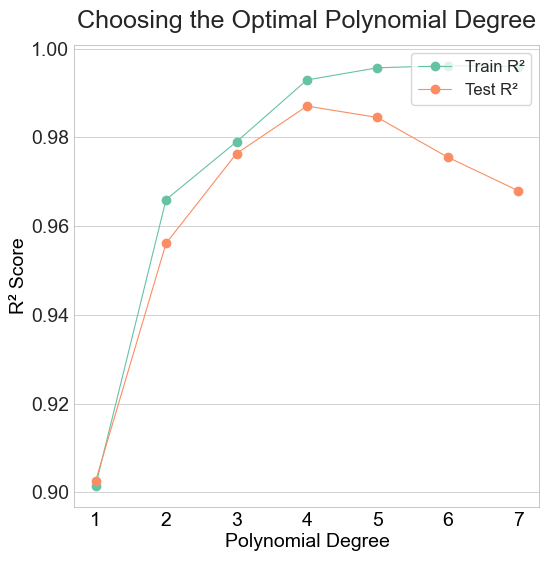

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1", "Y2"]]  # Predicting both Heating & Cooling Load

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Test multiple polynomial degrees
degrees = range(1, 8)
train_scores = []
test_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    Y_pred_train = model.predict(X_train_poly)
    Y_pred_test = model.predict(X_test_poly)
    
    train_scores.append(r2_score(Y_train, Y_pred_train))
    test_scores.append(r2_score(Y_test, Y_pred_test))

# Plot performance vs polynomial degree
plt.figure(figsize=(6, 6))
plt.plot(degrees, train_scores, label="Train R²", marker='o')
plt.plot(degrees, test_scores, label="Test R²", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("Choosing the Optimal Polynomial Degree")
plt.legend()
plt.show()

## Linear Reg Deg 1-6

In [32]:
# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1", "Y2"]]  # Predicting both Heating & Cooling Load

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def poly_lin(X_train, X_test, Y_train, Y_test, ML, ML_label, degree_label, alpha_label, scaling):

# Initialize and train linear regression model
    poly = PolynomialFeatures(degree=degree_label)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test) 
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Make predictions
    Y_pred_train = model.predict(X_train_poly)
    Y_pred_test = model.predict(X_test_poly)
    
    # Evaluate Model Performance
    r2_train = r2_score(Y_train, Y_pred_train)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    
    mae = mean_absolute_error(Y_test, Y_pred_test)  
    mse = mean_squared_error(Y_test, Y_pred_test)
    rmse = np.sqrt(mse)
    new_row = ({'Algorithm': [ML_label],'Feature Scaling':scaling,'Degree': degree_label,
                'Alpha': alpha_label,'R²-Test': [r2_test],'R²-Train': [r2_train], 
                'Mean Absolute Error (MAE)': [mae], 'Root Mean Squared Error (RMSE)': [rmse]})
    
    # Print Evaluation Metrics
    print(f"R² Score: {r2_test:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
    # Sample actual vs predicted values for two target variables
    y_actual = Y_test.to_numpy()  # Actual values (2 targets)
    y_predicted = Y_pred_test.copy()  # Predicted values (2 targets)
    
    # Convert lists
    y_actual = list(zip(*y_actual)) 
    y_predicted = list(zip(*y_predicted)) 
    
    plt.figure(figsize=(6, 6))
    plt.bar(["Train R²", "Test R²"], [r2_train, r2_test], color=['blue', 'orange'])
    plt.ylabel("R² Score")
    plt.title(f"Model Performance ({ML_label}, Alpha={alpha_label})")
    plt.ylim(0, 1)  
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_test, Y_test - Y_pred_test, color='#ffd92f', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot ({ML_label})")
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.hist(Y_test - Y_pred_test, bins=20,  alpha=0.7)
    plt.xlabel("Residuals (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({ML_label})")
    plt.show()
    plt.figure(figsize=(6, 12))
    
    # First target variable plot
    plt.subplot(2, 1, 1)
    plt.scatter(y_actual[0], y_predicted[0], color=heat, label="Test Data")
    plt.plot(y_actual[0], y_actual[0], color=heat_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Heating Load (Tons)")
    plt.legend(loc="lower right")
    
    # Second target variable plot
    plt.subplot(2, 1, 2)
    plt.scatter(y_actual[1], y_predicted[1], color=cold, label="Test Data")
    plt.plot(y_actual[1], y_actual[1], color=cold_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.ylabel("Predicted")
    plt.title("Cooling Load (Tons)")
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return new_row

R² Score: 0.9870
Mean Absolute Error (MAE): 0.6789
Mean Squared Error (MSE): 1.2168
Root Mean Squared Error (RMSE): 1.1031


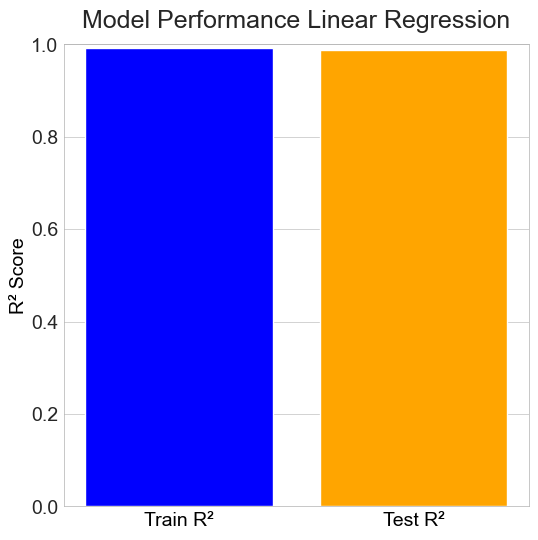

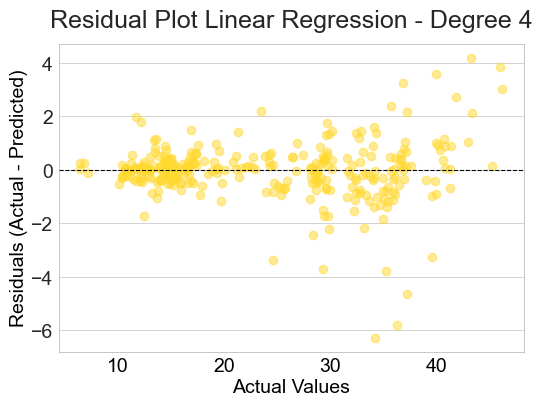

In [33]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Make predictions
Y_pred_train = model.predict(X_train_poly)
Y_pred_test = model.predict(X_test_poly)

# Evaluate Model Performance
r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)


mae = mean_absolute_error(Y_test, Y_pred_test)  
mse = mean_squared_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)


# Print Evaluation Metrics
print(f"R² Score: {r2_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Sample actual vs predicted values for two target variables
y_actual = Y_test.to_numpy()  # Actual values (2 targets)
y_predicted = Y_pred_test.copy()  # Predicted values (2 targets)

# Convert lists
y_actual = list(zip(*y_actual)) 
y_predicted = list(zip(*y_predicted)) 

plt.figure(figsize=(6, 6))
plt.bar(["Train R²", "Test R²"], [r2_train, r2_test], color=['blue', 'orange'])
plt.ylabel("R² Score")
plt.title("Model Performance Linear Regression")
plt.ylim(0, 1)  # Ensures R² remains in valid range
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(Y_test, Y_test - Y_pred_test, color='#ffd92f', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot Linear Regression - Degree 4")
plt.show()

R² Score: 0.9025
Mean Absolute Error (MAE): 2.1922
Mean Squared Error (MSE): 9.5408
Root Mean Squared Error (RMSE): 3.0888


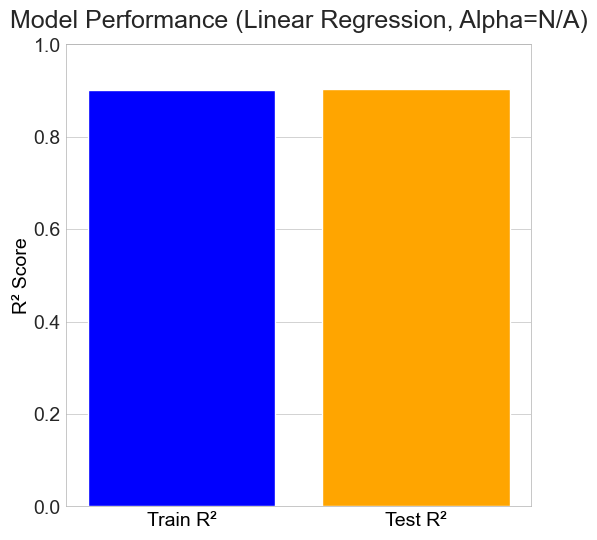

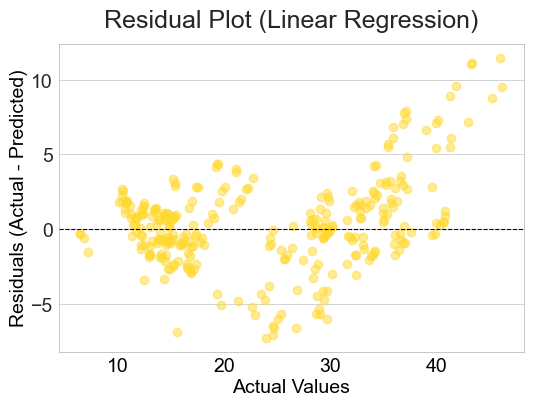

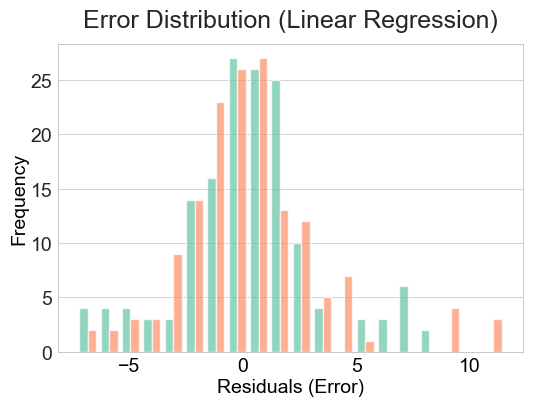

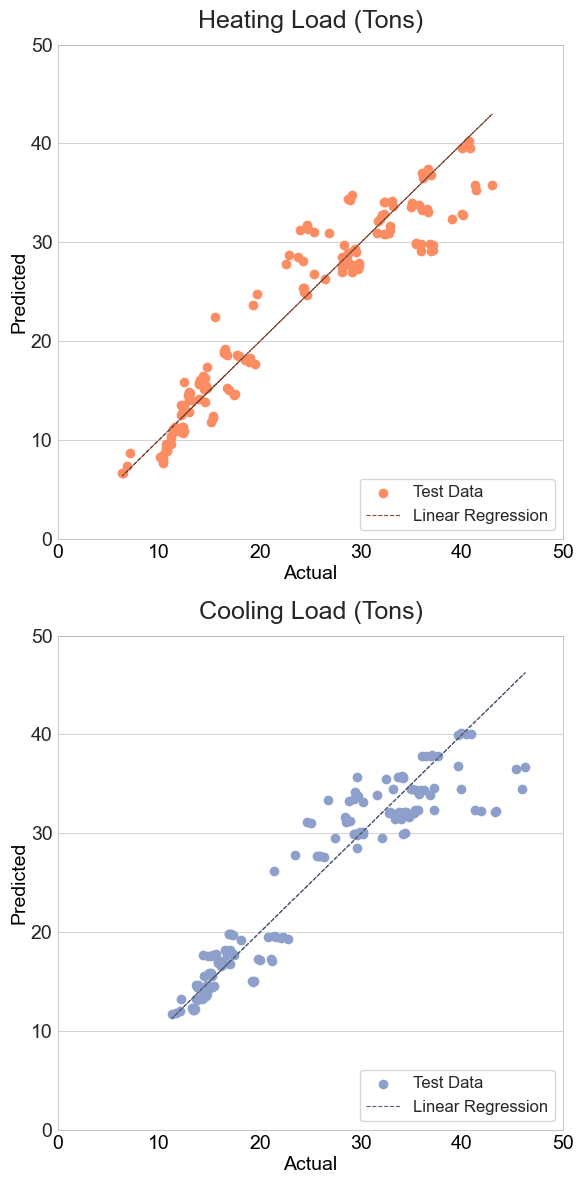

In [34]:
lin_deg1 = poly_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label=1, alpha_label="N/A", scaling="None")

In [35]:
results_df = pd.concat([results_df,pd.DataFrame(lin_deg1)]) #concatenating function results to results dataframe

In [36]:
results_df

Algorithm  Feature Scaling Degree Alpha   R²-Test  R²-Train  \
0  Linear Regression              N/A    N/A   N/A  0.902441  0.901032   
0  Linear Regression    MinMax Scaler    N/A   N/A  0.902702  0.901495   
0  Linear Regression  Standard Scaler    N/A   N/A  0.902705  0.901493   
0  Linear Regression             None      1   N/A  0.902532  0.901493   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  
0                   2.194482                        3.090519  
0                   2.189464                        3.086095  
0                   2.188684                        3.085987  
0                   2.192150                        3.088813

R² Score: 0.9561
Mean Absolute Error (MAE): 1.6283
Mean Squared Error (MSE): 4.2068
Root Mean Squared Error (RMSE): 2.0511


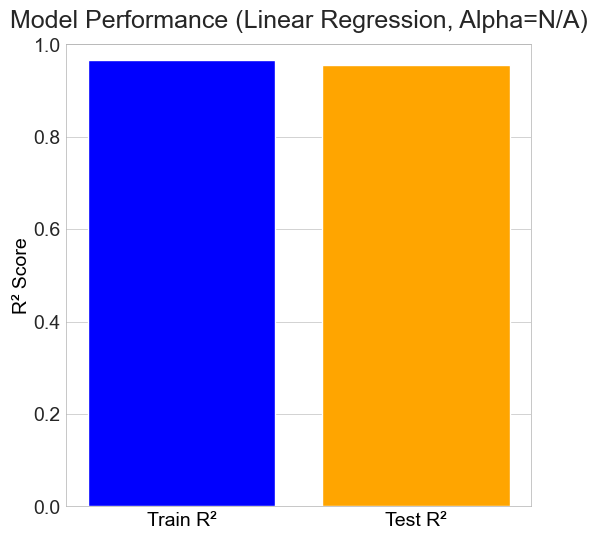

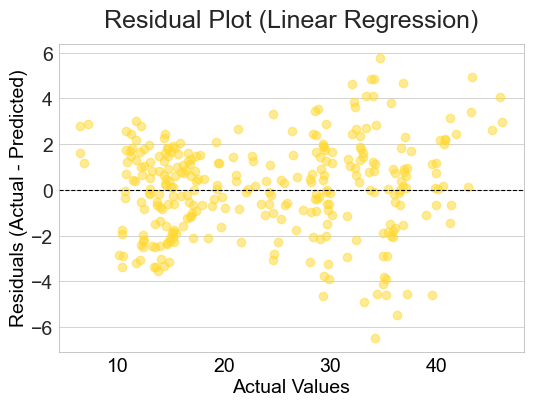

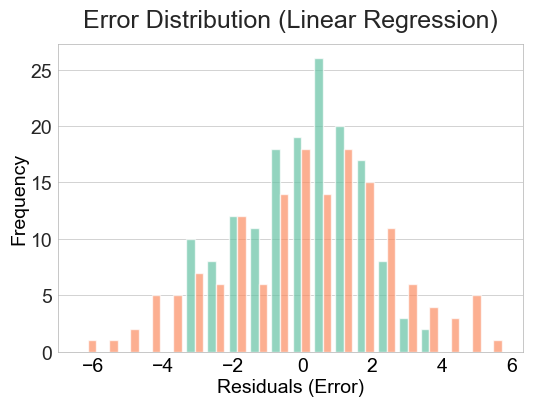

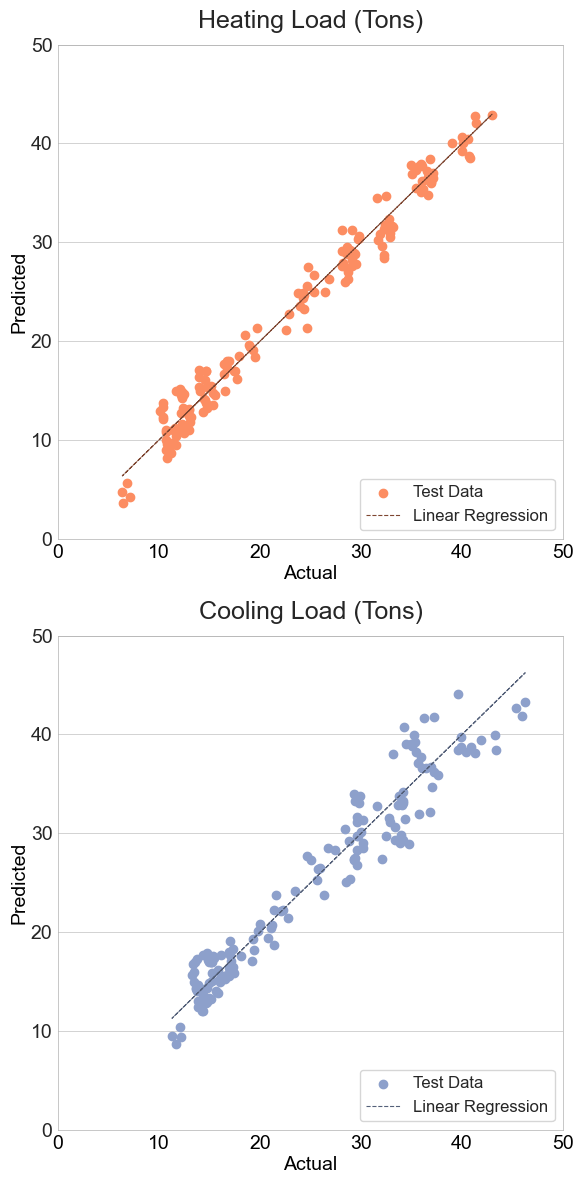

In [37]:
lin_deg2 = poly_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label=2, alpha_label="N/A", scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lin_deg2)]) #concatenating function results to results dataframe

R² Score: 0.9764
Mean Absolute Error (MAE): 1.0194
Mean Squared Error (MSE): 2.2127
Root Mean Squared Error (RMSE): 1.4875


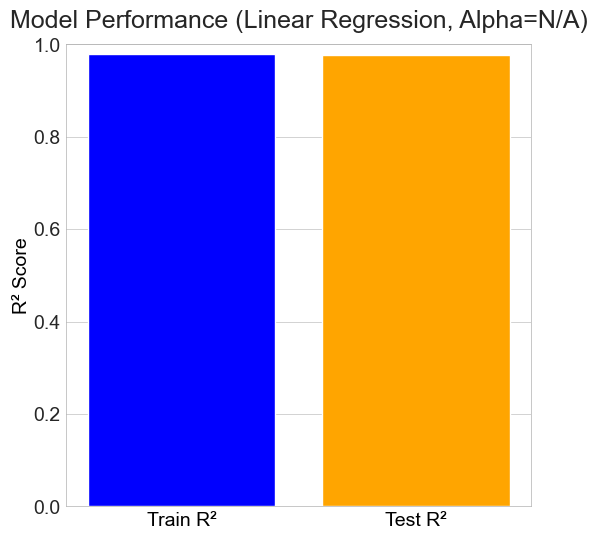

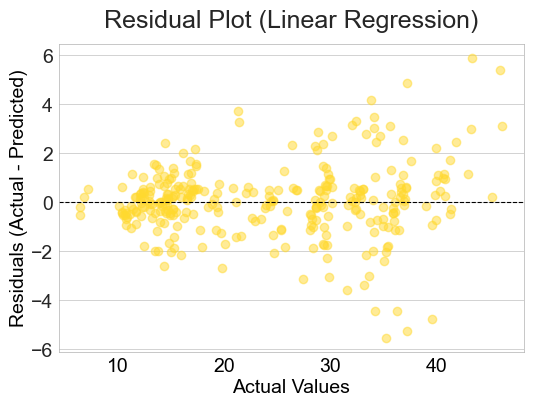

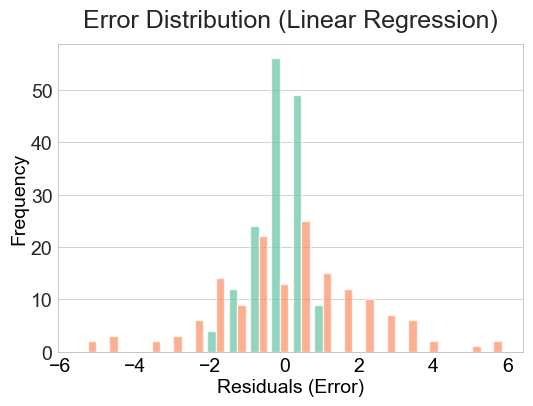

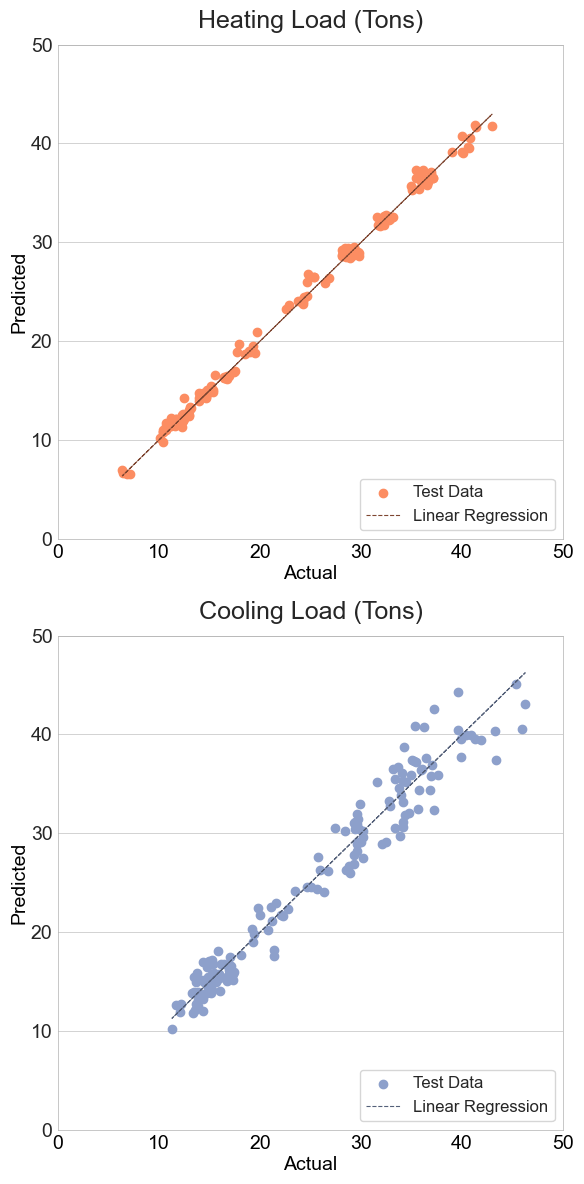

In [38]:
lin_deg3 = poly_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label=3, alpha_label="N/A", scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lin_deg3)])

R² Score: 0.9870
Mean Absolute Error (MAE): 0.6789
Mean Squared Error (MSE): 1.2168
Root Mean Squared Error (RMSE): 1.1031


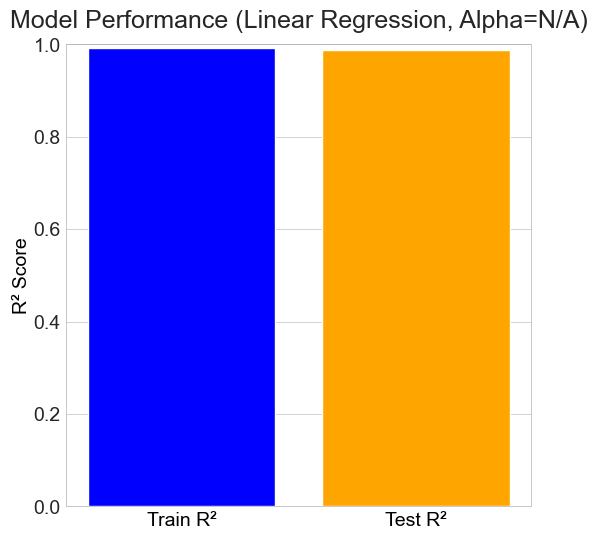

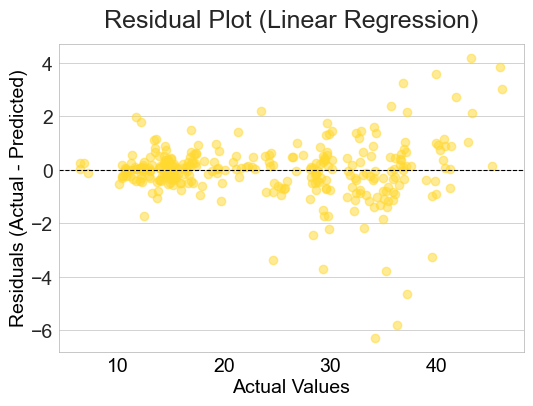

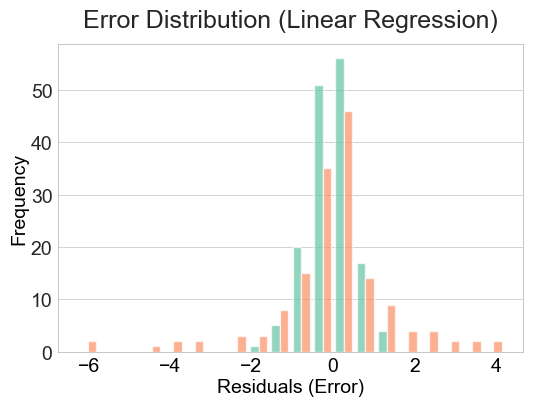

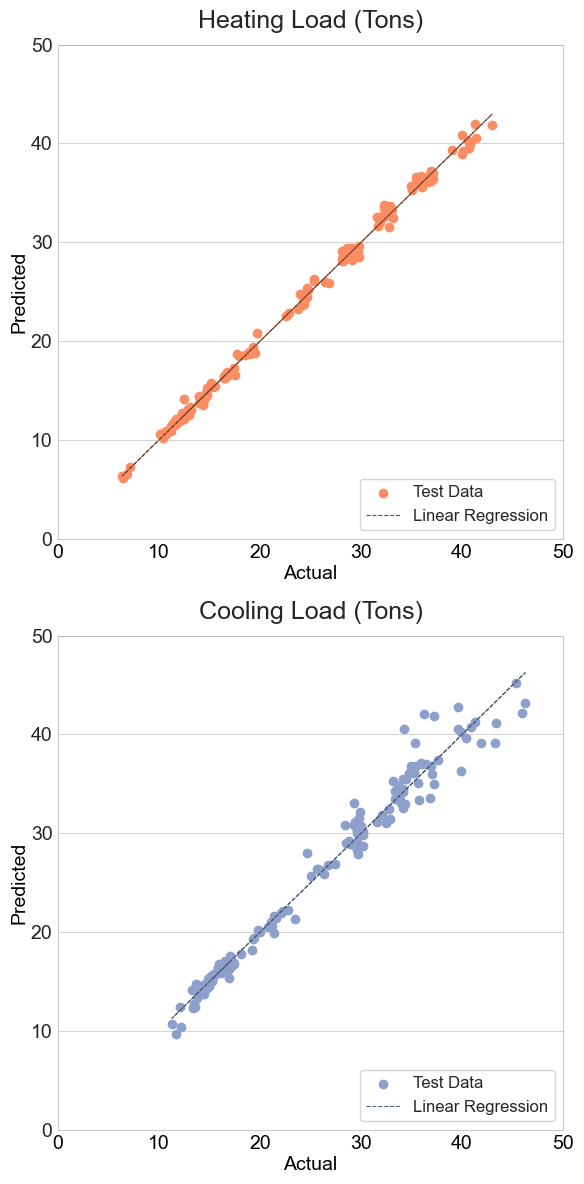

In [39]:
lin_deg4 = poly_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label=4, alpha_label="N/A", scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lin_deg4)])

R² Score: 0.9845
Mean Absolute Error (MAE): 0.7245
Mean Squared Error (MSE): 1.4516
Root Mean Squared Error (RMSE): 1.2048


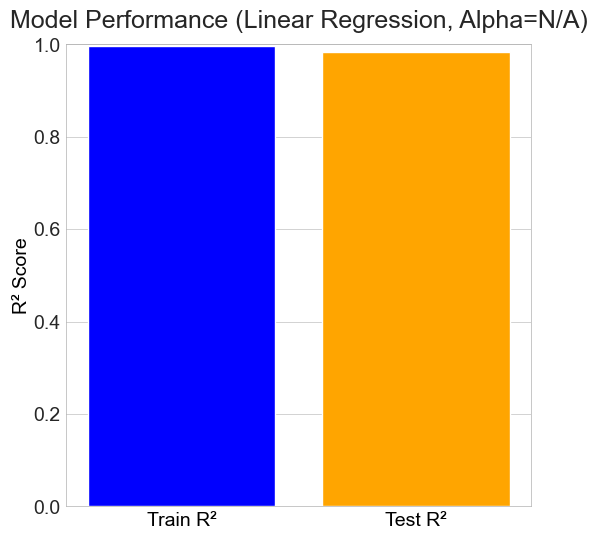

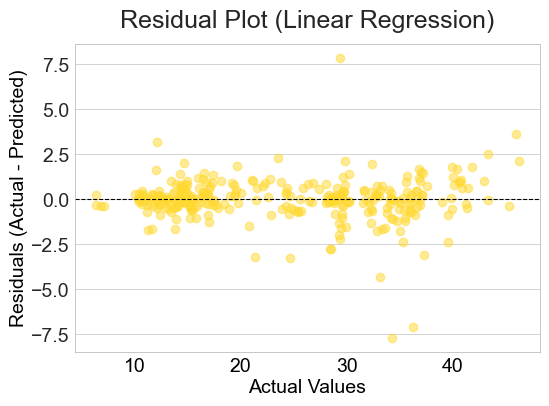

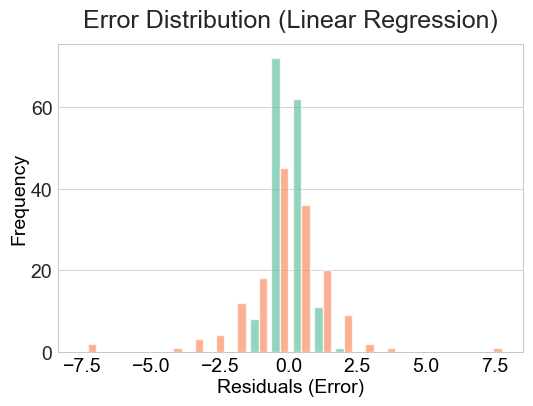

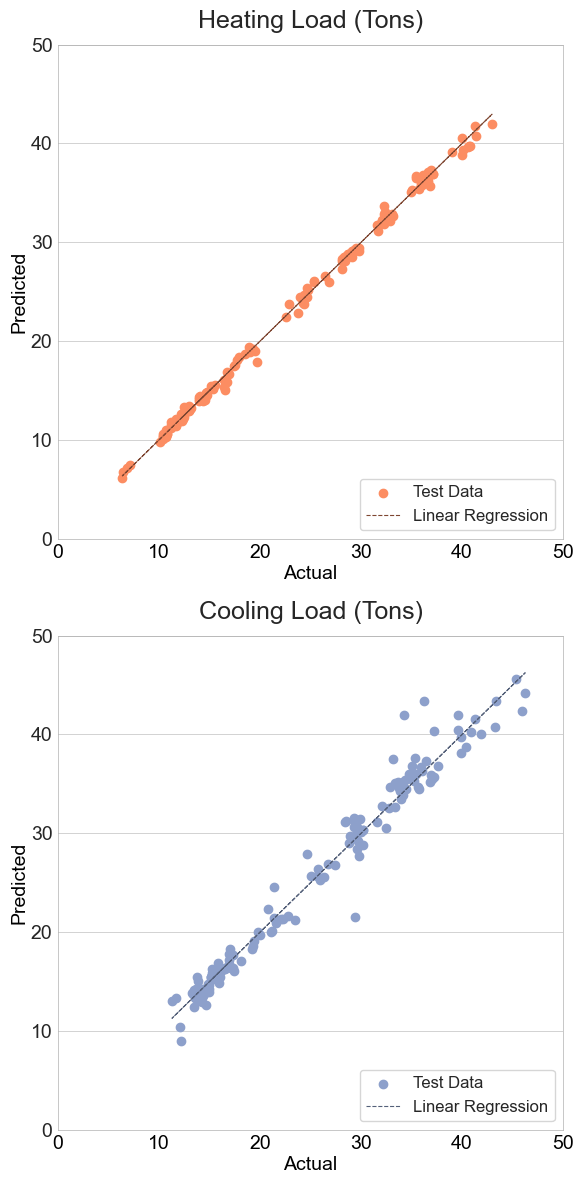

In [40]:
lin_deg5 = poly_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label=5, alpha_label="N/A", scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lin_deg5)])

R² Score: 0.9755
Mean Absolute Error (MAE): 0.8216
Mean Squared Error (MSE): 2.2833
Root Mean Squared Error (RMSE): 1.5111


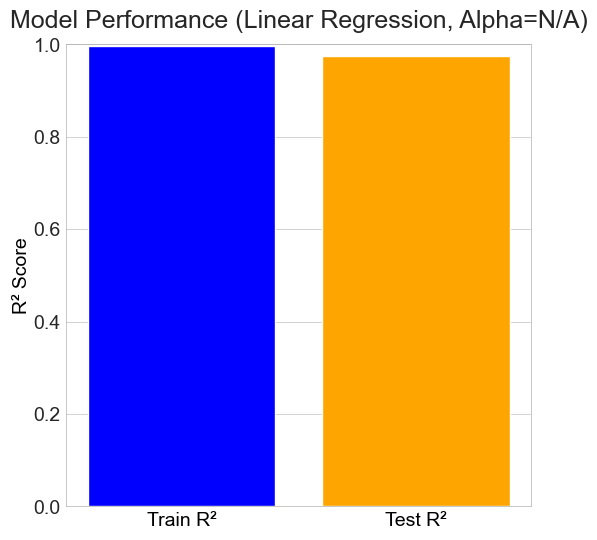

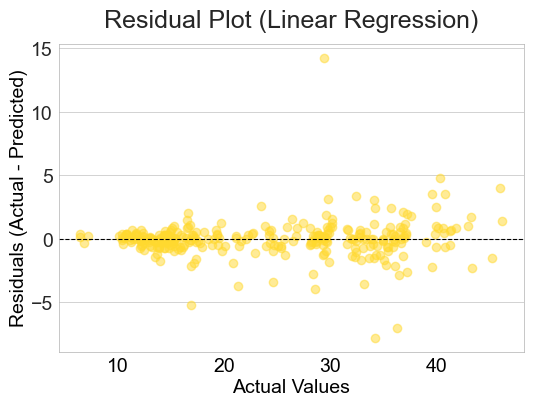

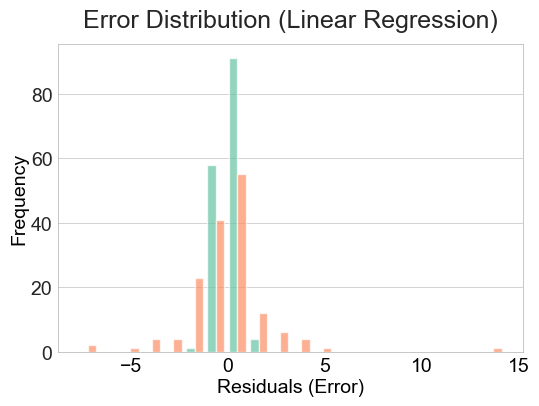

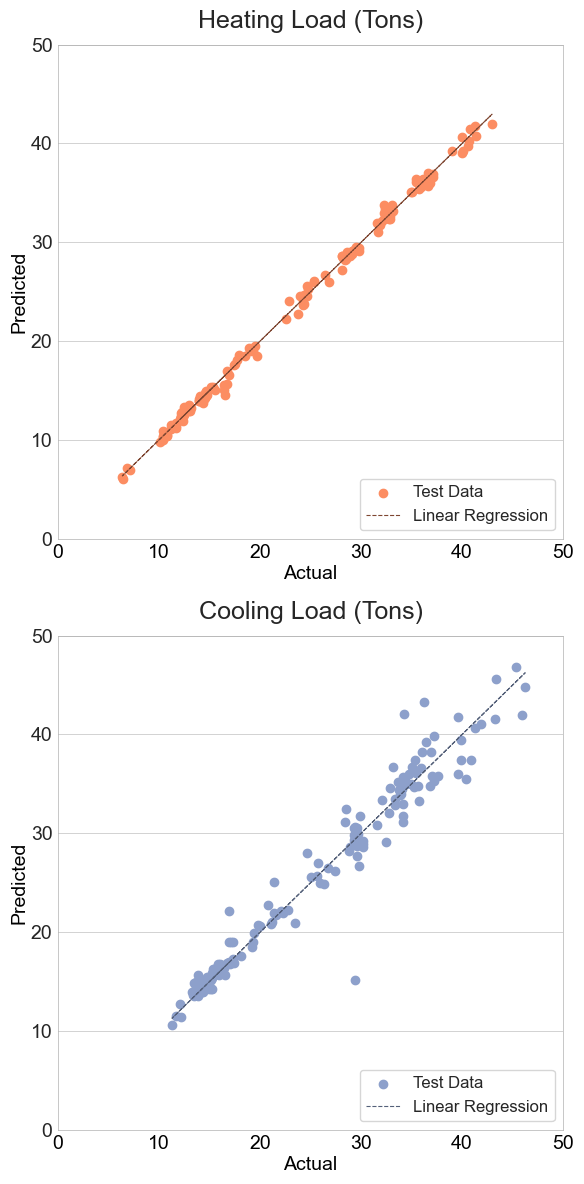

In [41]:
lin_deg6 = poly_lin(X_train, X_test, Y_train, Y_test, ML=LinearRegression(), 
          ML_label="Linear Regression", degree_label=6, alpha_label="N/A", scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lin_deg6)])

In [42]:
results_df

Algorithm  Feature Scaling Degree Alpha   R²-Test  R²-Train  \
0  Linear Regression              N/A    N/A   N/A  0.902441  0.901032   
0  Linear Regression    MinMax Scaler    N/A   N/A  0.902702  0.901495   
0  Linear Regression  Standard Scaler    N/A   N/A  0.902705  0.901493   
0  Linear Regression             None      1   N/A  0.902532  0.901493   
0  Linear Regression             None      2   N/A  0.956110  0.965971   
0  Linear Regression             None      3   N/A  0.976356  0.979002   
0  Linear Regression             None      4   N/A  0.987044  0.992931   
0  Linear Regression             None      5   N/A  0.984483  0.995675   
0  Linear Regression             None      6   N/A  0.975513  0.996154   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  
0                   2.194482                        3.090519  
0                   2.189464                        3.086095  
0                   2.188684                        3.085987  
0                   2.192150                        3.088813  
0                   1.628259                        2.051058  
0                   1.019444                        1.487525  
0                   0.678858                        1.103066  
0                   0.724522                        1.204818  
0                   0.821553                        1.511052

## Ridge

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_values = [0.01, 0.1, 1, 10, 100]
param_grid = {"alpha": alpha_values}

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Best alpha value
best_alpha = grid_search.best_params_["alpha"]
print(f"Optimal alpha: {best_alpha}")

Optimal alpha: 0.01


In [44]:
from sklearn.linear_model import Ridge

In [45]:
def ridge_lin(X_train, X_test, Y_train, Y_test,  ML_label, degree_label, alpha_label, scaling):
    # Initialize and train linear regression model
    model = Ridge(alpha=alpha_label)
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    
    # Evaluate Model Performance
    r2 = r2_score(Y_test, Y_pred)
    r2_train = r2_score(Y_train, Y_pred_train)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    new_row = ({'Algorithm': [ML_label],'Feature Scaling':scaling,'Degree': degree_label,
                'Alpha': alpha_label,'R²-Test': [r2],'R²-Train': [r2_train], 
                'Mean Absolute Error (MAE)': [mae], 'Root Mean Squared Error (RMSE)': [rmse]})
    
    # Print Evaluation Metrics
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



    # Sample actual vs predicted values for two target variables
    y_actual = Y_test.to_numpy()  # Actual values (2 targets)
    y_predicted = Y_pred.copy()  # Predicted values (2 targets)
    
    # Convert lists
    y_actual = list(zip(*y_actual)) 
    y_predicted = list(zip(*y_predicted)) 
        
    plt.figure(figsize=(6, 6))
    plt.bar(["Train R²", "Test R²"], [r2_train, r2_test], color=['blue', 'orange'])
    plt.ylabel("R² Score")
    plt.title(f"Model Performance ({ML_label}, Alpha={alpha_label})")
    plt.ylim(0, 1)  
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_test, Y_test - Y_pred_test, color='red', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot ({ML_label})")
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.hist(Y_test - Y_pred_test, bins=20,  alpha=0.7)
    plt.xlabel("Residuals (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({ML_label})")
    plt.show()
    plt.figure(figsize=(6, 12))
    
    # First target variable plot
    plt.subplot(2, 1, 1)
    plt.scatter(y_actual[0], y_predicted[0], color=heat, label="Test Data")
    plt.plot(y_actual[0], y_actual[0], color=heat_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Heating Load (Tons)")
    plt.legend(loc="lower right")
    
    # Second target variable plot
    plt.subplot(2, 1, 2)
    plt.scatter(y_actual[1], y_predicted[1], color=cold, label="Test Data")
    plt.plot(y_actual[1], y_actual[1], color=cold_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.ylabel("Predicted")
    plt.title("Cooling Load (Tons)")
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return new_row

In [46]:

# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1", "Y2"]]  # Predicting both Heating & Cooling Load

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

R² Score: 0.9025
Mean Absolute Error (MAE): 2.1913
Mean Squared Error (MSE): 9.5433
Root Mean Squared Error (RMSE): 3.0892


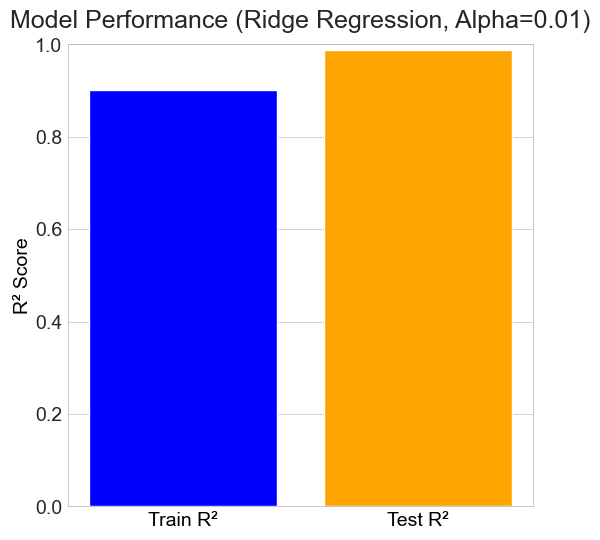

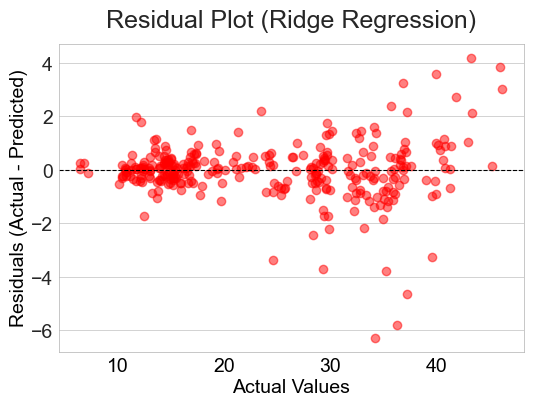

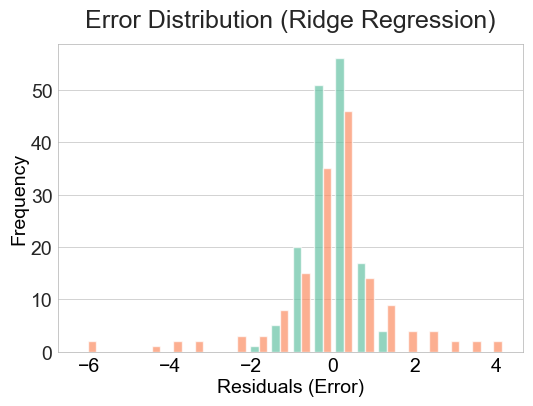

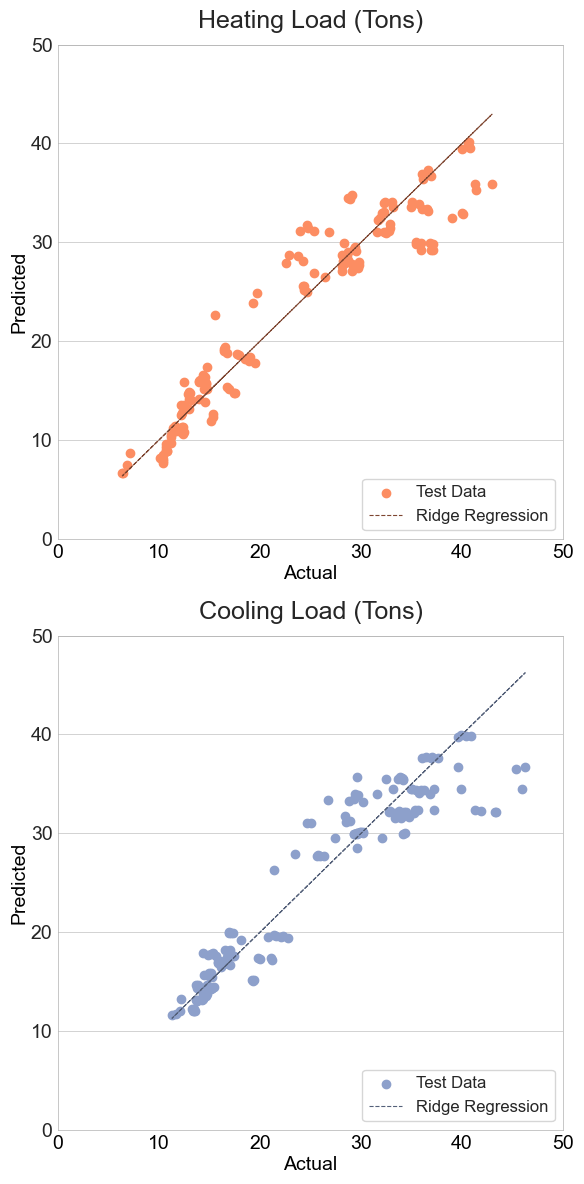

In [47]:
ridge001 = ridge_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Ridge Regression", degree_label="N/A", alpha_label=0.01, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(ridge001)])

R² Score: 0.9005
Mean Absolute Error (MAE): 2.2358
Mean Squared Error (MSE): 9.7467
Root Mean Squared Error (RMSE): 3.1220


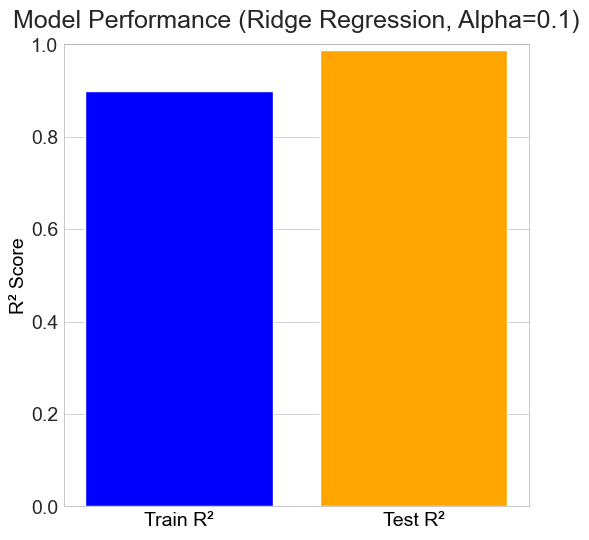

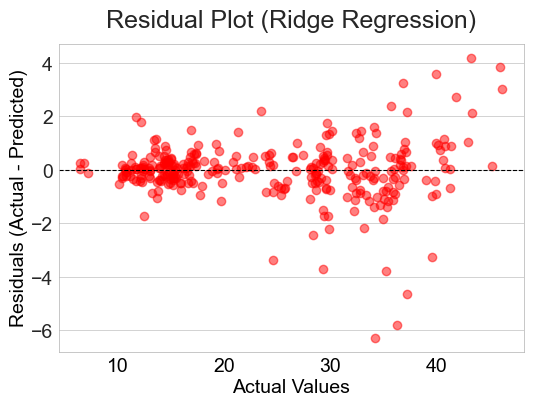

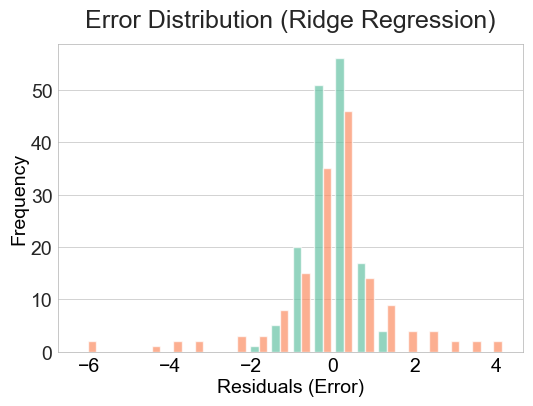

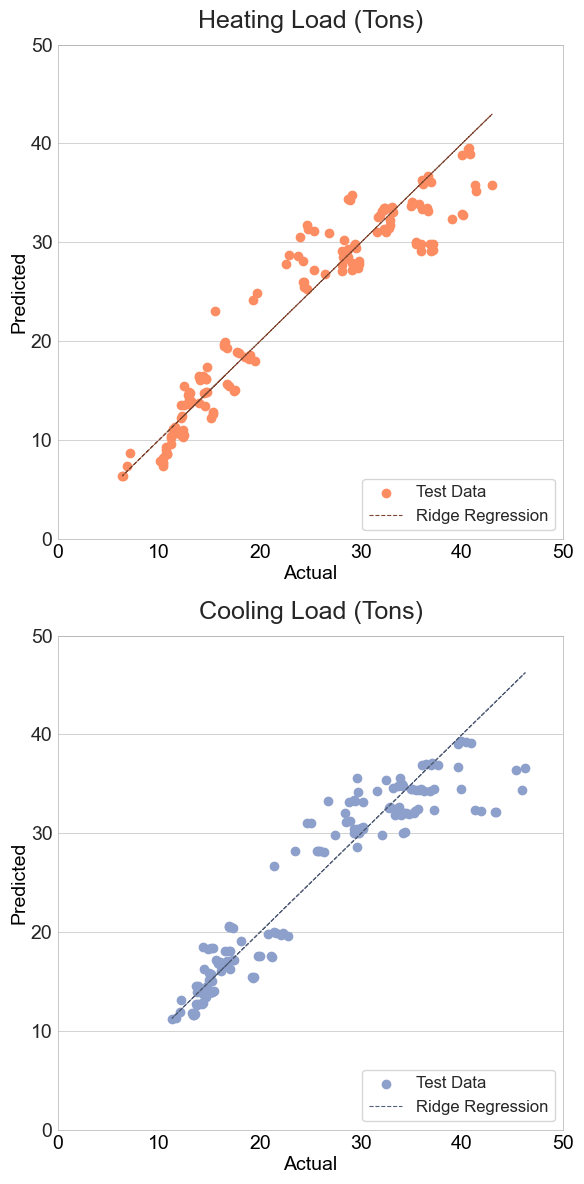

In [48]:
ridge01 = ridge_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Ridge Regression", degree_label="N/A", alpha_label=0.1, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(ridge01)])

R² Score: 0.8979
Mean Absolute Error (MAE): 2.3030
Mean Squared Error (MSE): 9.9994
Root Mean Squared Error (RMSE): 3.1622


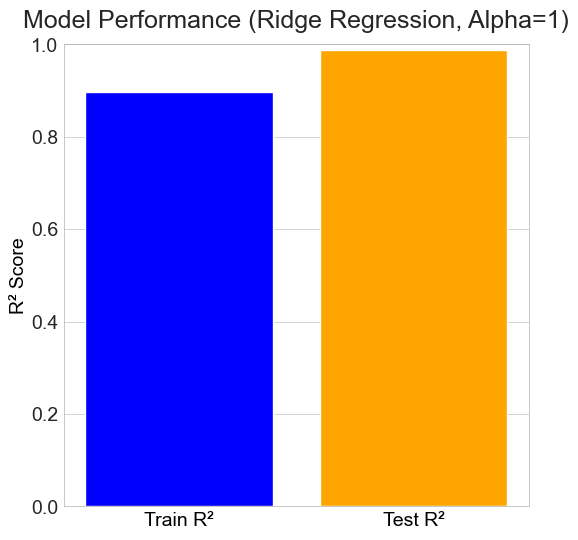

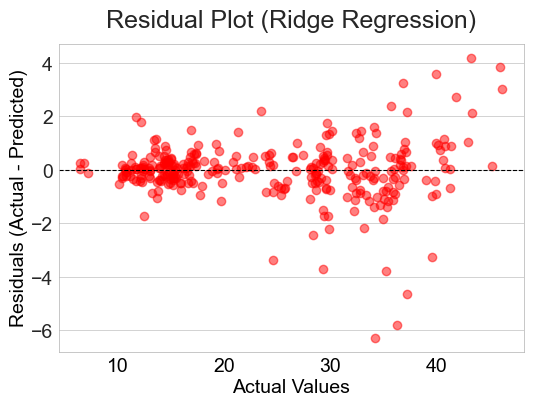

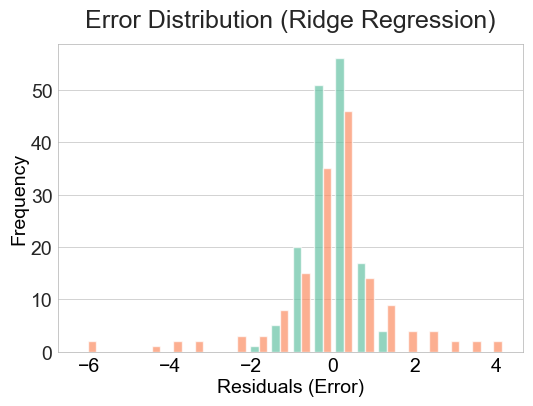

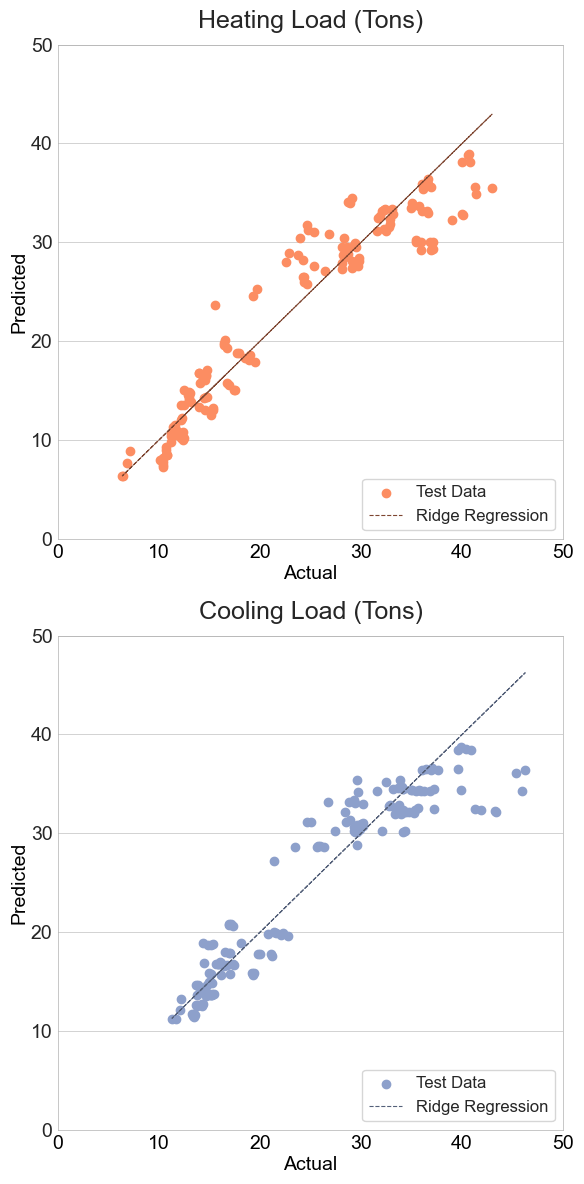

In [49]:
ridge1 = ridge_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Ridge Regression", degree_label="N/A", alpha_label=1, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(ridge1)])

R² Score: 0.8879
Mean Absolute Error (MAE): 2.4487
Mean Squared Error (MSE): 10.9917
Root Mean Squared Error (RMSE): 3.3154


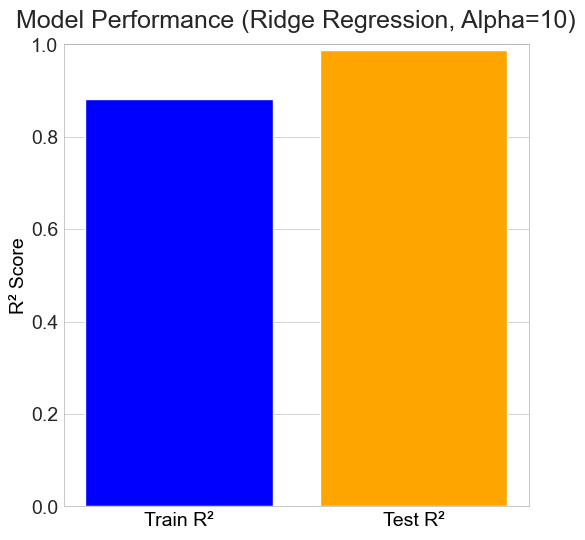

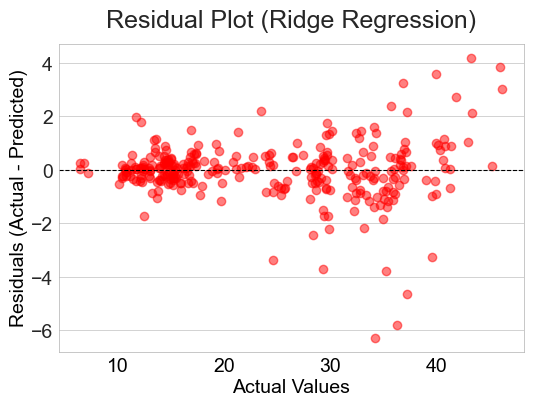

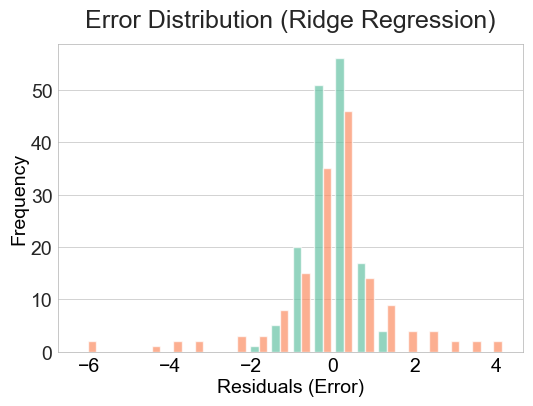

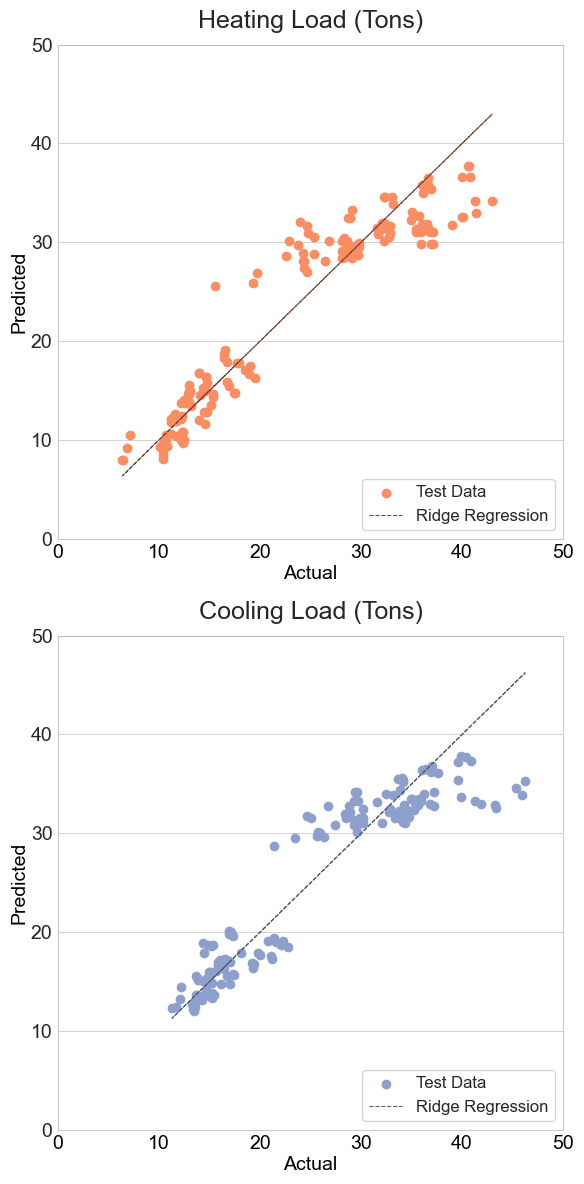

In [50]:
ridge10 = ridge_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Ridge Regression", degree_label="N/A", alpha_label=10, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(ridge10)])

In [51]:
results_df

Algorithm  Feature Scaling Degree Alpha   R²-Test  R²-Train  \
0  Linear Regression              N/A    N/A   N/A  0.902441  0.901032   
0  Linear Regression    MinMax Scaler    N/A   N/A  0.902702  0.901495   
0  Linear Regression  Standard Scaler    N/A   N/A  0.902705  0.901493   
0  Linear Regression             None      1   N/A  0.902532  0.901493   
0  Linear Regression             None      2   N/A  0.956110  0.965971   
0  Linear Regression             None      3   N/A  0.976356  0.979002   
0  Linear Regression             None      4   N/A  0.987044  0.992931   
0  Linear Regression             None      5   N/A  0.984483  0.995675   
0  Linear Regression             None      6   N/A  0.975513  0.996154   
0   Ridge Regression             None    N/A  0.01  0.902510  0.901404   
0   Ridge Regression             None    N/A   0.1  0.900451  0.899663   
0   Ridge Regression             None    N/A     1  0.897867  0.896688   
0   Ridge Regression             None    N/A    10  0.887856  0.882815   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  
0                   2.194482                        3.090519  
0                   2.189464                        3.086095  
0                   2.188684                        3.085987  
0                   2.192150                        3.088813  
0                   1.628259                        2.051058  
0                   1.019444                        1.487525  
0                   0.678858                        1.103066  
0                   0.724522                        1.204818  
0                   0.821553                        1.511052  
0                   2.191319                        3.089218  
0                   2.235795                        3.121970  
0                   2.302976                        3.162179  
0                   2.448659                        3.315368

## Lasso

In [52]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso regression
lasso_model = Lasso(alpha=0.01)  
lasso_model.fit(X_train, Y_train)

# Predictions
Y_pred_lasso = lasso_model.predict(X_test)

# Evaluation Metrics
r2_lasso = r2_score(Y_test, Y_pred_lasso)
mae_lasso = mean_absolute_error(Y_test, Y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)

rmse_lasso = np.sqrt(mean_squared_error(Y_test, Y_pred_lasso))

print("Lasso Regression:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")

# Check eliminated features
print("Lasso Coefficients:", lasso_model.coef_)

Lasso Regression:
R² Score: 0.8970
MAE: 2.3164
MSE: 10.0855
RMSE: 3.1758
Lasso Coefficients: [[-0.00000000e+00  1.54643864e-02  3.69110373e-02 -6.62259671e-03
   5.35797384e+00 -1.67984793e-02  1.97174543e+01  2.22238506e-01]
 [-0.00000000e+00  2.01449562e-02  2.21555034e-02 -3.64824134e-03
   5.47131775e+00  5.54551903e-02  1.43876208e+01  4.57209074e-02]]


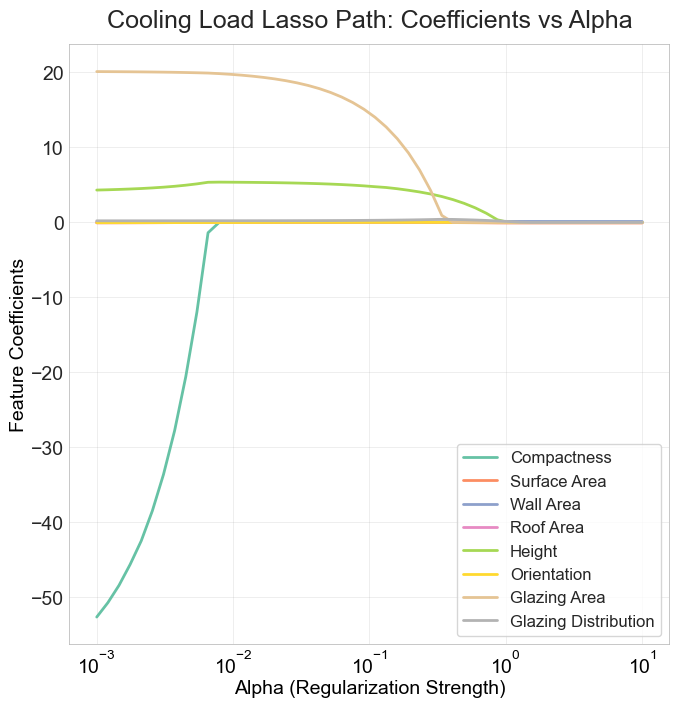

In [53]:



# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data["Y1"] 

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Range of alpha values 
alphas = np.logspace(-3, 1, 50)  # From 0.001 to 10
coefficients = []

# Fit Lasso for each alpha and store coefficients
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=5000)
    model.fit(X_train, Y_train)
    coefficients.append(model.coef_)

coefficients = np.array(coefficients)

# Plot coefficient paths
fig = plt.figure(figsize=(6,6))

ax = plt.axes((0,0,1,1))
for i in range(X.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i], linewidth=2)

plt.xscale("log")  
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Feature Coefficients")
plt.title("Cooling Load Lasso Path: Coefficients vs Alpha")
plt.legend(column_mapping.values(), loc='lower right')
plt.grid(alpha=0.3)
plt.show()

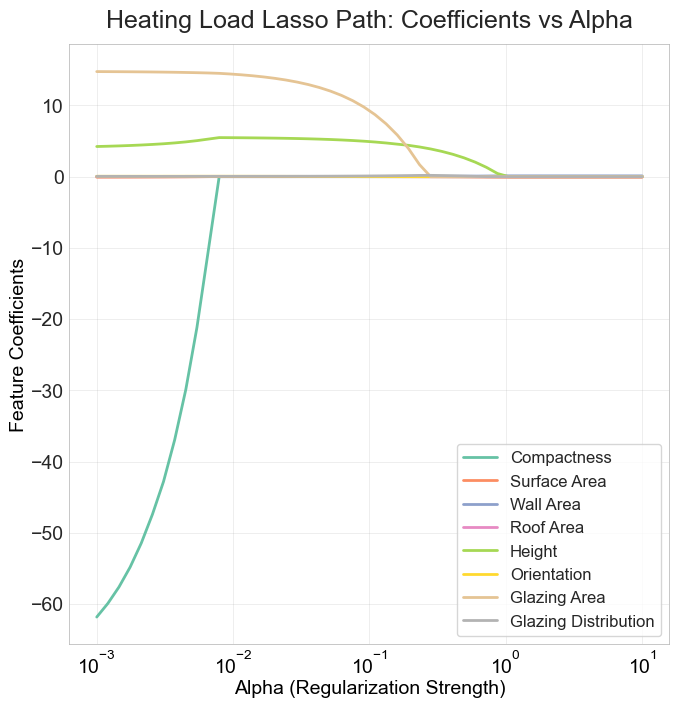

In [54]:



# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data["Y2"]  

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Range of alpha values 
alphas = np.logspace(-3, 1, 50)  # From 0.001 to 10
coefficients = []

# Fit Lasso for each alpha and store coefficients
for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=5000)
    model.fit(X_train, Y_train)
    coefficients.append(model.coef_)

coefficients = np.array(coefficients)

# Plot coefficient paths
fig = plt.figure(figsize=(6,6))

ax = plt.axes((0,0,1,1))
for i in range(X.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i], linewidth=2)

plt.xscale("log")  
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Feature Coefficients")
plt.title("Heating Load Lasso Path: Coefficients vs Alpha")
plt.legend(column_mapping.values(), loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [55]:
def lasso_lin(X_train, X_test, Y_train, Y_test,  ML_label, degree_label, alpha_label, scaling):
    # Initialize and train linear regression model
    model = Lasso(alpha=alpha_label,max_iter=5000)
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    
    # Evaluate Model Performance
    r2 = r2_score(Y_test, Y_pred)
    r2_train = r2_score(Y_train, Y_pred_train)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    new_row = ({'Algorithm': [ML_label],'Feature Scaling':scaling,'Degree': degree_label,
                'Alpha': alpha_label,'R²-Test': [r2],'R²-Train': [r2_train], 
                'Mean Absolute Error (MAE)': [mae], 'Root Mean Squared Error (RMSE)': [rmse]})
    
    # Print Evaluation Metrics
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



    # Sample actual vs predicted values for two target variables
    y_actual = Y_test.to_numpy()  # Actual values (2 targets)
    y_predicted = Y_pred.copy()  # Predicted values (2 targets)
    
    # Convert lists
    y_actual = list(zip(*y_actual)) 
    y_predicted = list(zip(*y_predicted)) 
        
    plt.figure(figsize=(6, 6))
    plt.bar(["Train R²", "Test R²"], [r2_train, r2_test], color=['blue', 'orange'])
    plt.ylabel("R² Score")
    plt.title(f"Model Performance ({ML_label}, Alpha={alpha_label})")
    plt.ylim(0, 1)  # Ensures R² remains in valid range
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_test, Y_test - Y_pred_test, color='red', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot ({ML_label})")
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.hist(Y_test - Y_pred_test, bins=20,  alpha=0.7)
    plt.xlabel("Residuals (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({ML_label})")
    plt.show()
    plt.figure(figsize=(6, 12))
    
    # First target variable plot
    plt.subplot(2, 1, 1)
    plt.scatter(y_actual[0], y_predicted[0], color=heat, label="Test Data")
    plt.plot(y_actual[0], y_actual[0], color=heat_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Heating Load (Tons)")
    plt.legend(loc="lower right")
    
    # Second target variable plot
    plt.subplot(2, 1, 2)
    plt.scatter(y_actual[1], y_predicted[1], color=cold, label="Test Data")
    plt.plot(y_actual[1], y_actual[1], color=cold_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.ylabel("Predicted")
    plt.title("Cooling Load (Tons)")
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return new_row

In [56]:
column_mapping.values()

dict_values(['Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Height', 'Orientation', 'Glazing Area', 'Glazing Distribution', 'Heating Load', 'Cooling Load'])

In [57]:
# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1","Y2"]]  

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


R² Score: 0.9025
Mean Absolute Error (MAE): 2.1920
Mean Squared Error (MSE): 9.5463
Root Mean Squared Error (RMSE): 3.0897


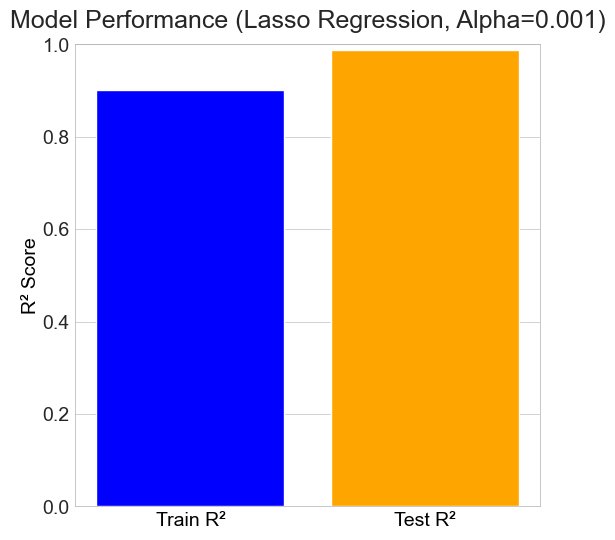

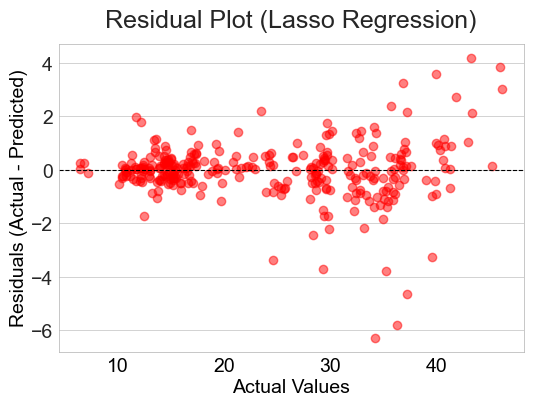

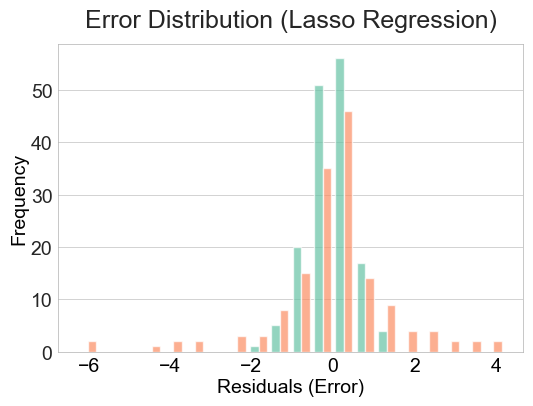

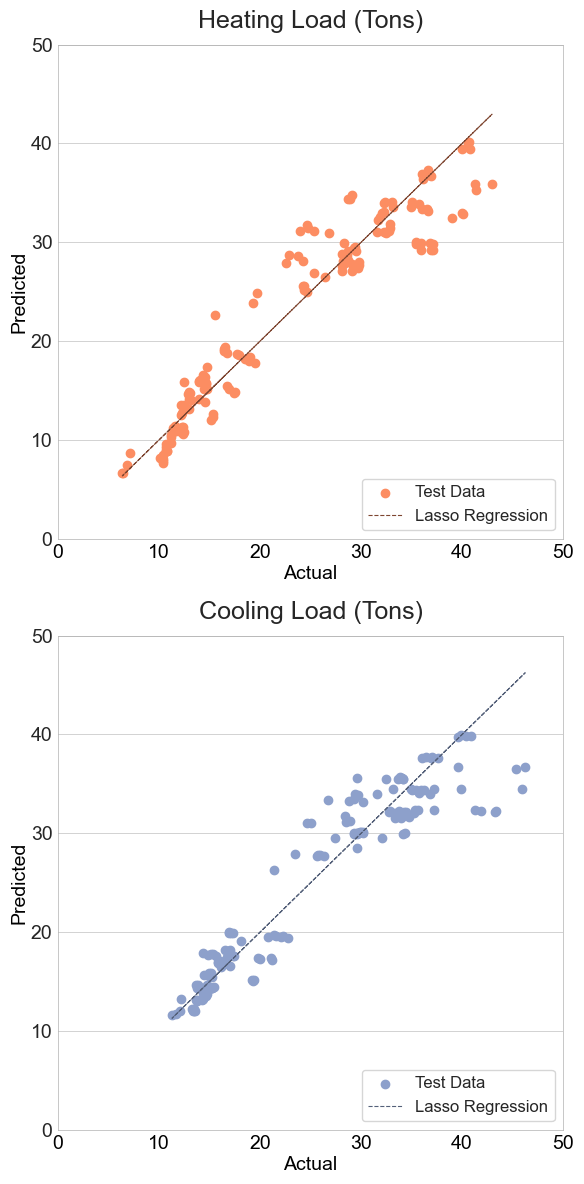

In [58]:
lasso0001 = lasso_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Lasso Regression", degree_label="N/A", alpha_label=0.001, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lasso0001)])

R² Score: 0.8970
Mean Absolute Error (MAE): 2.3164
Mean Squared Error (MSE): 10.0855
Root Mean Squared Error (RMSE): 3.1758


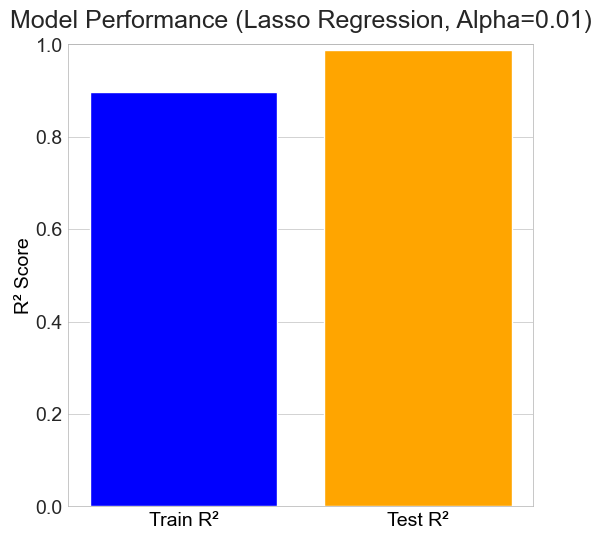

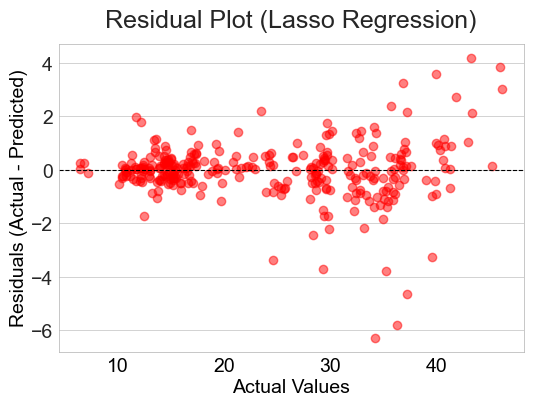

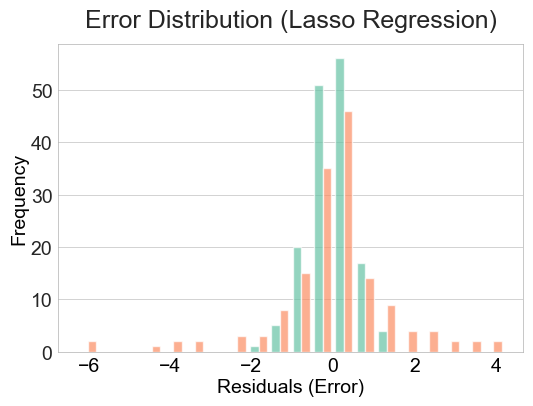

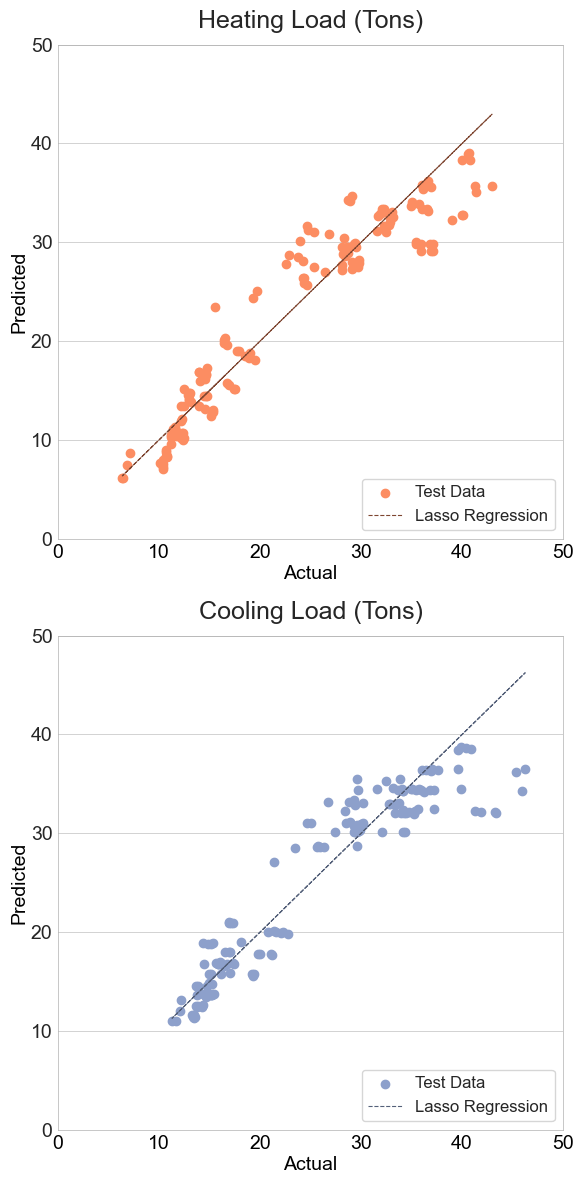

In [59]:
lasso001 = lasso_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Lasso Regression", degree_label="N/A", alpha_label=0.01, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lasso001)])

R² Score: 0.8920
Mean Absolute Error (MAE): 2.3745
Mean Squared Error (MSE): 10.5649
Root Mean Squared Error (RMSE): 3.2504


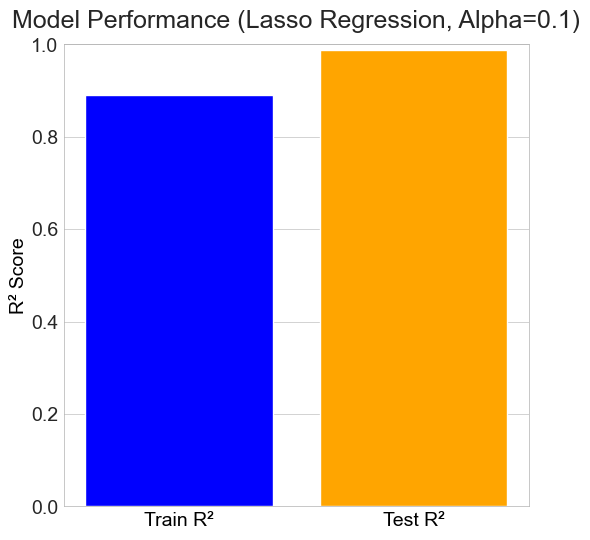

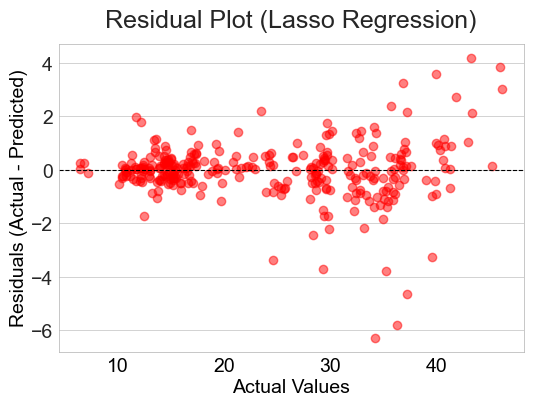

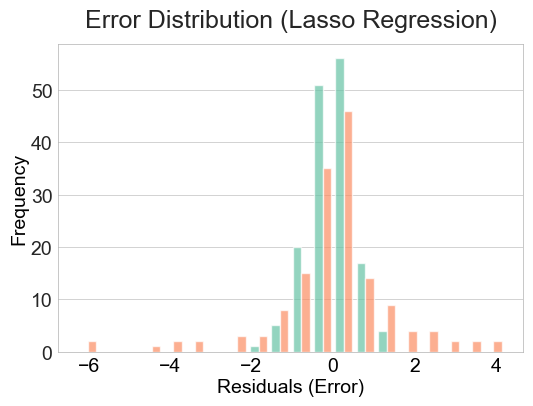

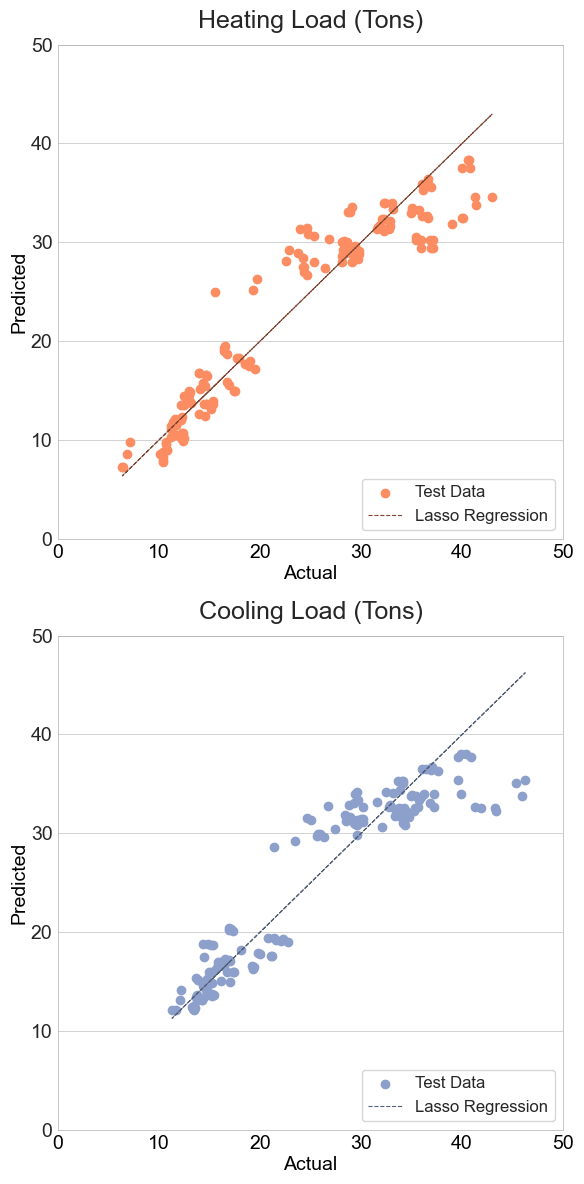

In [60]:
lasso01 = lasso_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Lasso Regression", degree_label="N/A", alpha_label=0.1, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lasso01)])

R² Score: 0.7831
Mean Absolute Error (MAE): 3.3495
Mean Squared Error (MSE): 21.2859
Root Mean Squared Error (RMSE): 4.6137


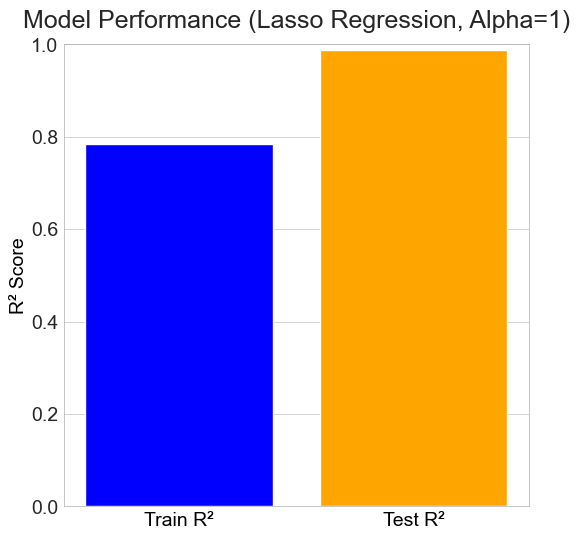

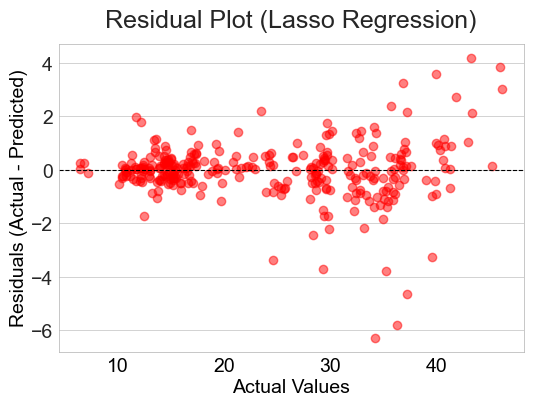

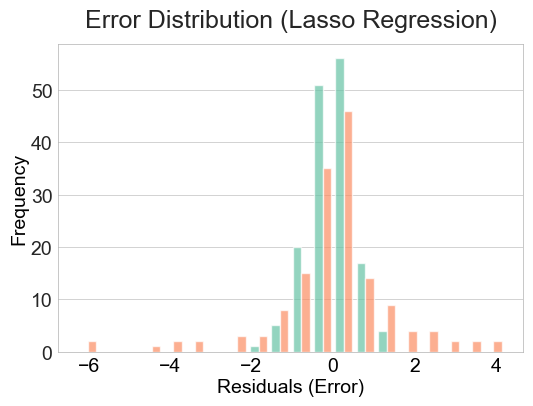

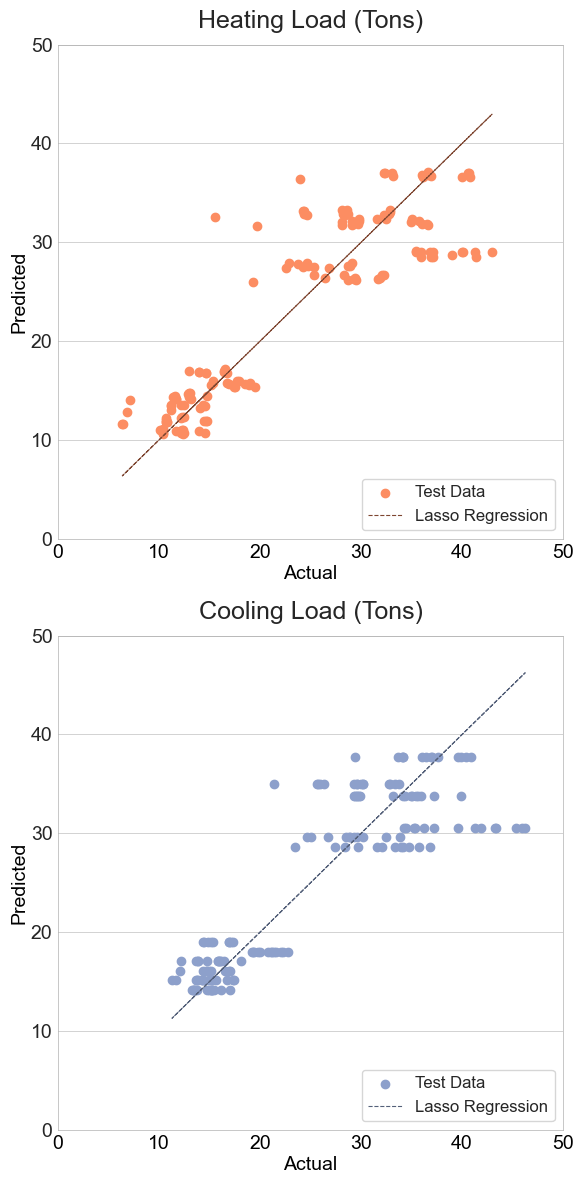

In [61]:
lasso1 = lasso_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Lasso Regression", degree_label="N/A", alpha_label=1, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lasso1)])

R² Score: 0.7801
Mean Absolute Error (MAE): 3.3572
Mean Squared Error (MSE): 21.5915
Root Mean Squared Error (RMSE): 4.6467


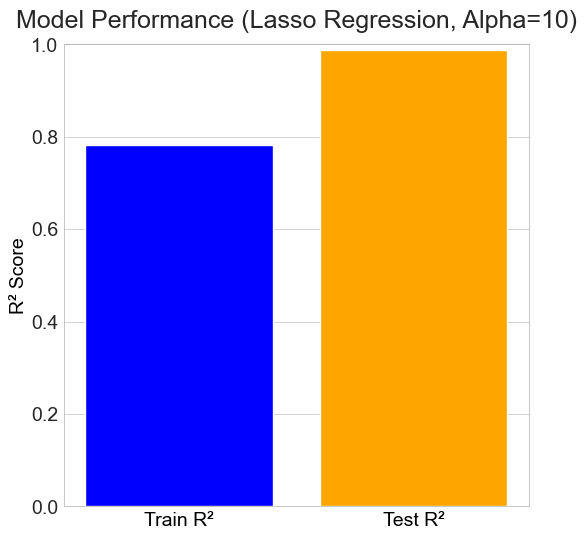

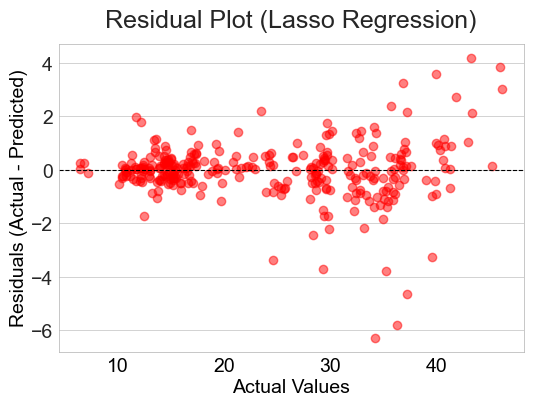

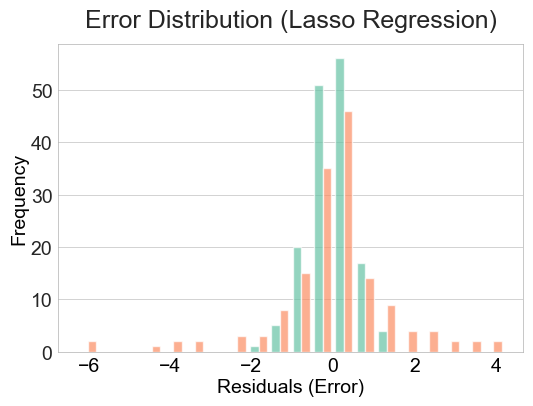

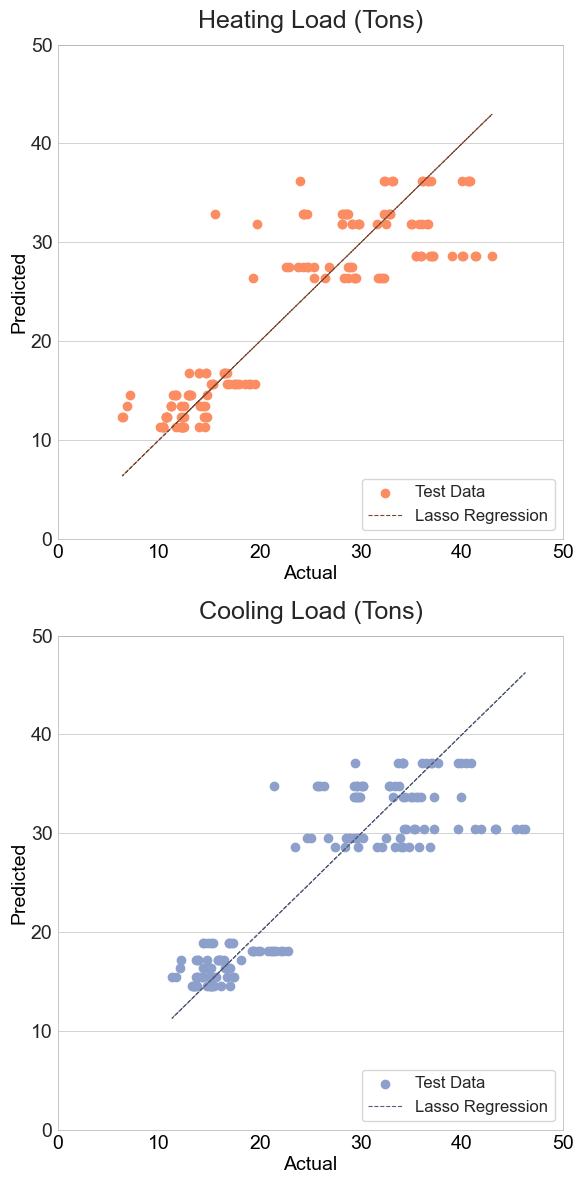

In [62]:
lasso10 = lasso_lin(X_train, X_test, Y_train, Y_test,  
          ML_label="Lasso Regression", degree_label="N/A", alpha_label=10, scaling="None")
results_df = pd.concat([results_df,pd.DataFrame(lasso10)])

In [63]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

## Neural Network

In [64]:
from sklearn.neural_network import MLPRegressor

In [65]:
# Define features (X) and targets (Y)
X = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]
Y = data[["Y1","Y2"]]  

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [66]:
def nn(X_train, X_test, Y_train, Y_test,  ML_label, degree_label, alpha_label, scaling, iterations): #similar function for calculating KNN, with variable for k
    model = MLPRegressor(max_iter=iterations, alpha=alpha_label)
    model.fit(X_train, Y_train)
    
    # Make predictions
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    
    # Evaluate Model Performance
    r2 = r2_score(Y_test, Y_pred)
    r2_train = r2_score(Y_train, Y_pred_train)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    new_row = ({'Algorithm': [ML_label],'Feature Scaling':scaling,'Degree': degree_label,
                'Alpha': alpha_label,'R²-Test': [r2],'R²-Train': [r2_train], 
                'Mean Absolute Error (MAE)': [mae], 'Root Mean Squared Error (RMSE)': [rmse]})
    
    # Print Evaluation Metrics
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



    # Sample actual vs predicted values for two target variables
    y_actual = Y_test.to_numpy()  # Actual values (2 targets)
    y_predicted = Y_pred.copy()  # Predicted values (2 targets)
    
    # Convert lists
    y_actual = list(zip(*y_actual)) 
    y_predicted = list(zip(*y_predicted)) 

    plt.figure(figsize=(6, 6))
    plt.bar(["Train R²", "Test R²"], [r2_train, r2_test], color=['blue', 'orange'])
    plt.ylabel("R² Score")
    plt.title(f"Model Performance ({ML_label}, Alpha={alpha_label})")
    plt.ylim(0, 1) 
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_test, Y_test - Y_pred_test, color='red', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot ({ML_label})")
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.hist(Y_test - Y_pred_test, bins=20,  alpha=0.7)
    plt.xlabel("Residuals (Error)")
    plt.ylabel("Frequency")
    plt.title(f"Error Distribution ({ML_label})")
    plt.show()
    plt.figure(figsize=(6, 12))
    
    # First target variable plot
    plt.subplot(2, 1, 1)
    plt.scatter(y_actual[0], y_predicted[0], color=heat, label="Test Data")
    plt.plot(y_actual[0], y_actual[0], color=heat_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Heating Load (Tons)")
    plt.legend(loc="lower right")
    
    # Second target variable plot
    plt.subplot(2, 1, 2)
    plt.scatter(y_actual[1], y_predicted[1], color=cold, label="Test Data")
    plt.plot(y_actual[1], y_actual[1], color=cold_l, linestyle="--", label=ML_label)
    plt.xlabel("Actual")
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.ylabel("Predicted")
    plt.title("Cooling Load (Tons)")
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return new_row

R² Score: 0.8127
Mean Absolute Error (MAE): 3.1824
Mean Squared Error (MSE): 18.4164
Root Mean Squared Error (RMSE): 4.2914


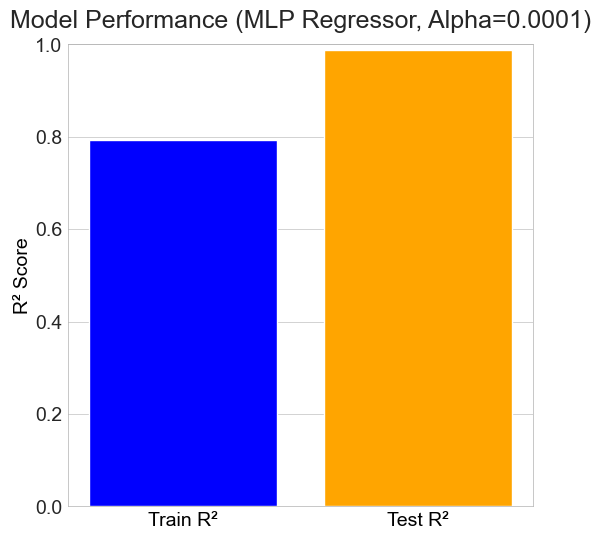

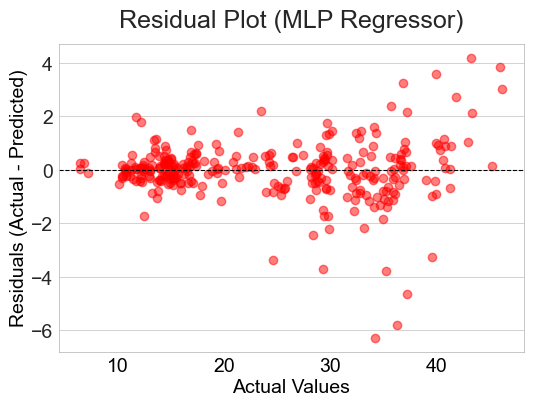

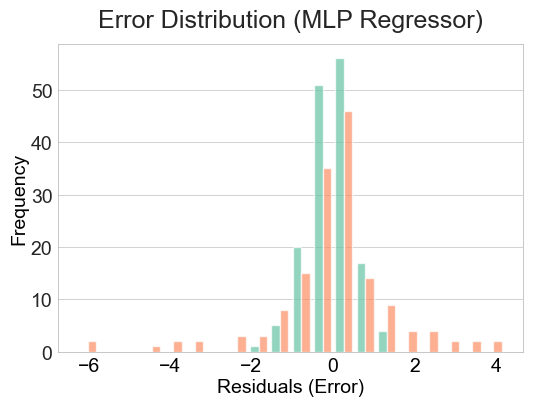

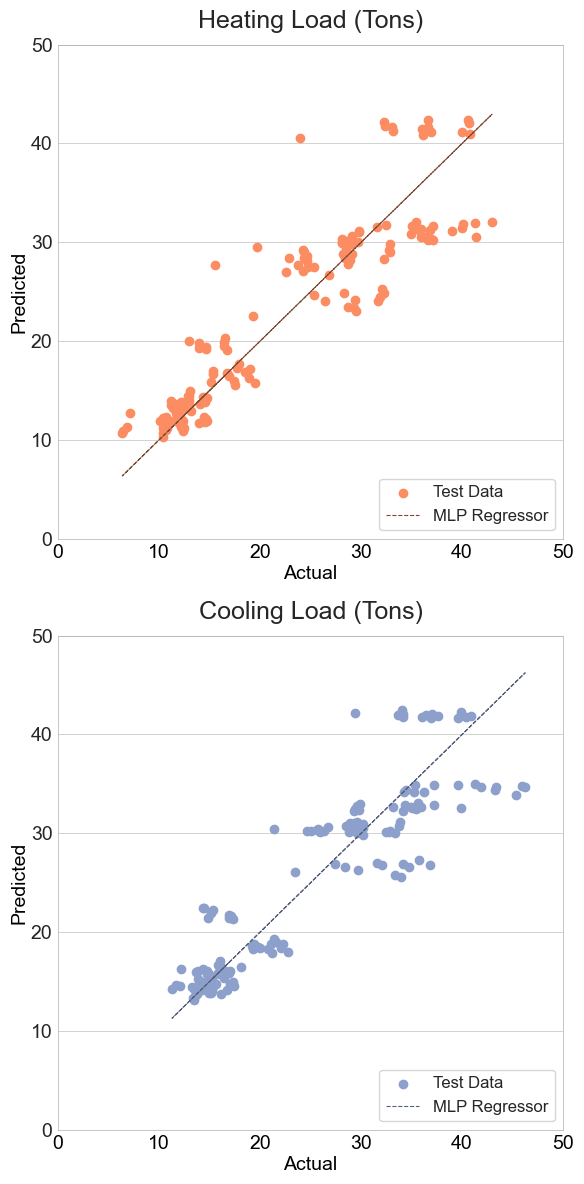

In [67]:
nn0001 = nn(X_train, X_test, Y_train, Y_test,  ML_label="MLP Regressor", 
            degree_label="N/A", alpha_label=0.0001, scaling="N/A", iterations=2000)
results_df = pd.concat([results_df,pd.DataFrame(nn0001)])

R² Score: 0.8760
Mean Absolute Error (MAE): 2.7216
Mean Squared Error (MSE): 12.1412
Root Mean Squared Error (RMSE): 3.4844


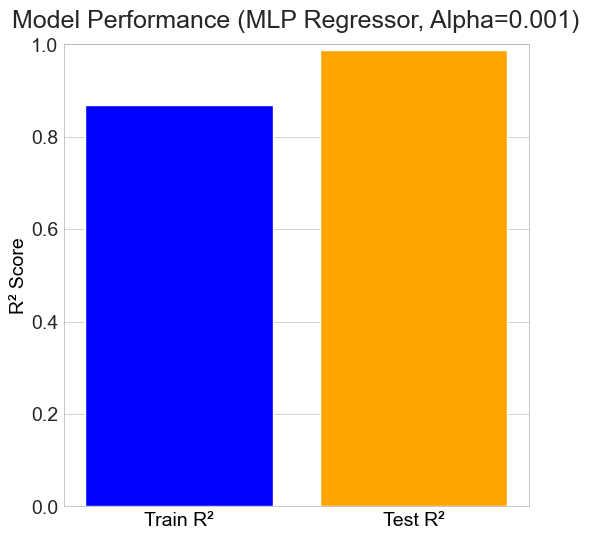

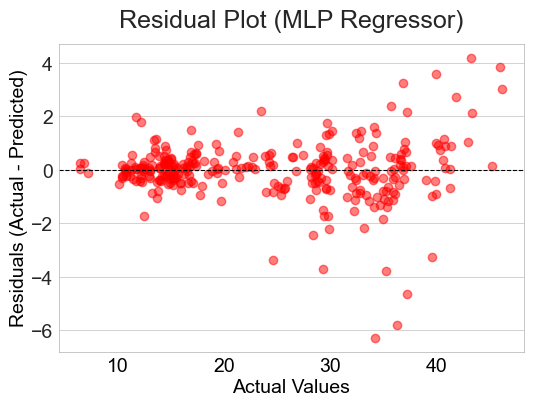

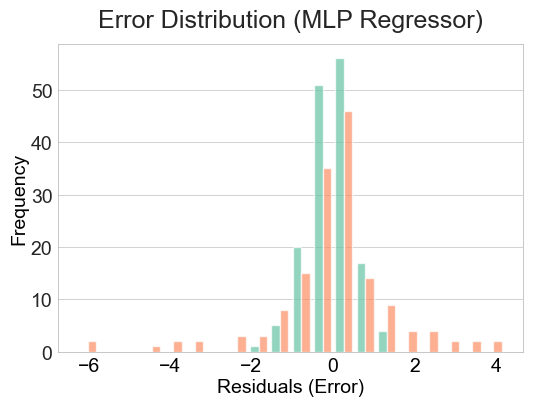

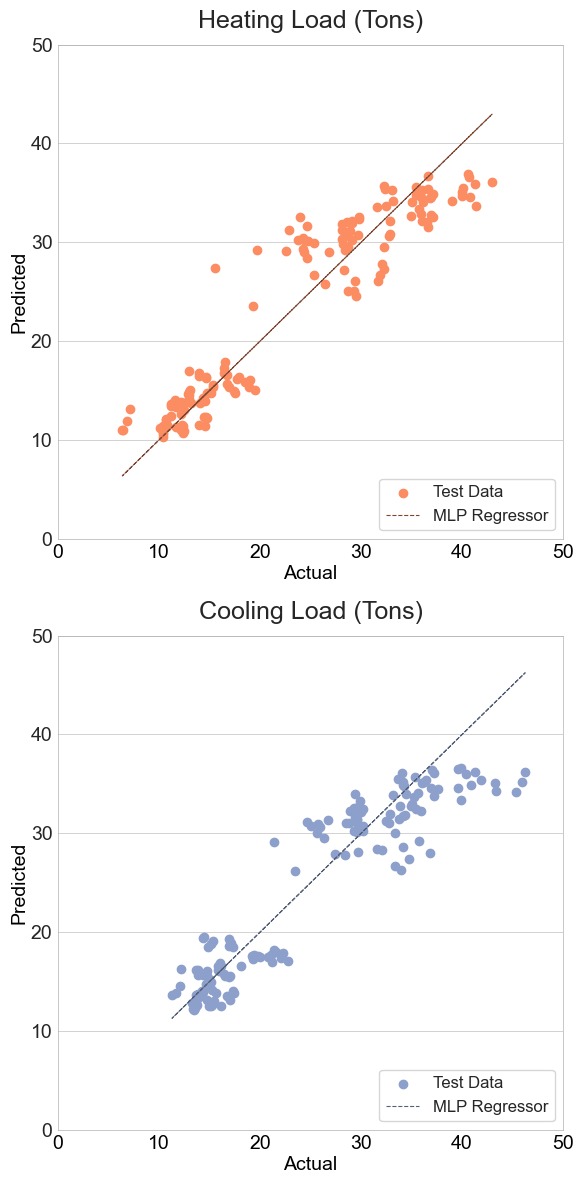

In [68]:
nn001 = nn(X_train, X_test, Y_train, Y_test,  ML_label="MLP Regressor", 
            degree_label="N/A", alpha_label=0.001, scaling="N/A", iterations=2000)
results_df = pd.concat([results_df,pd.DataFrame(nn001)])

R² Score: 0.7987
Mean Absolute Error (MAE): 3.5758
Mean Squared Error (MSE): 19.6434
Root Mean Squared Error (RMSE): 4.4321


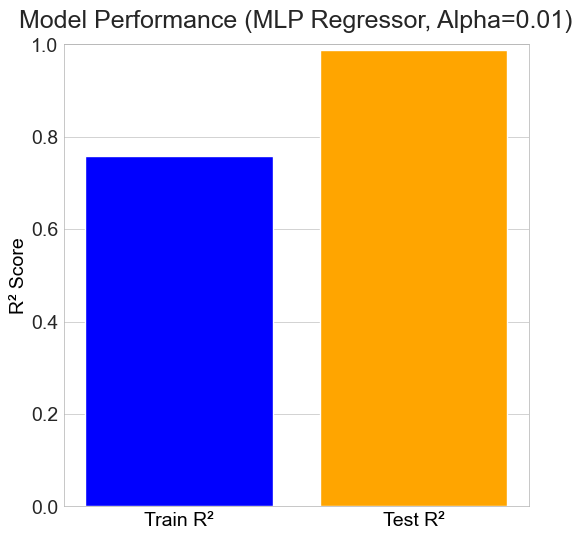

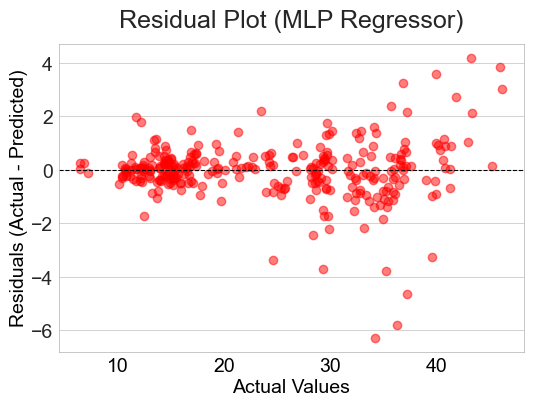

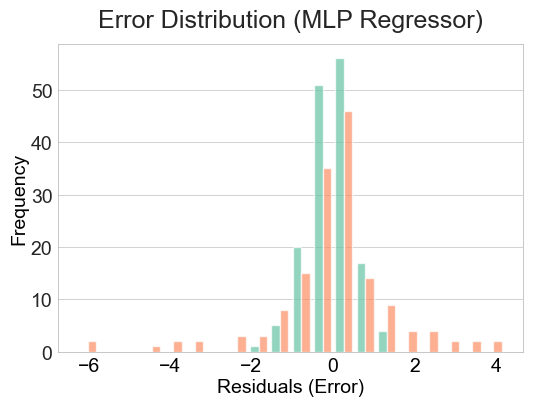

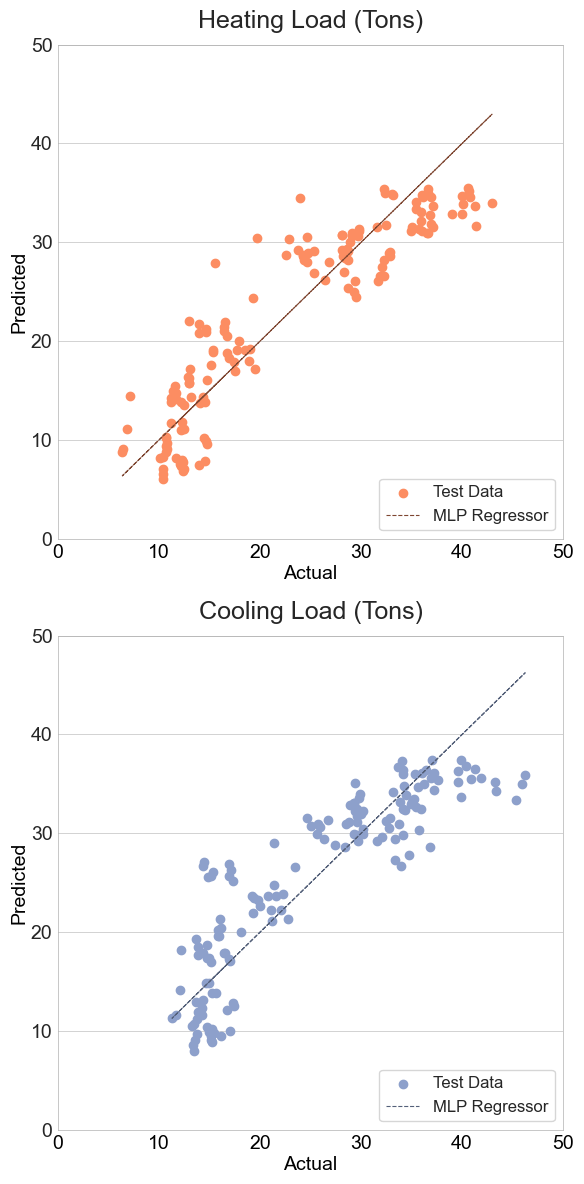

In [69]:
nn01 = nn(X_train, X_test, Y_train, Y_test,  ML_label="MLP Regressor", 
            degree_label="N/A", alpha_label=0.01, scaling="N/A", iterations=2000)
results_df = pd.concat([results_df,pd.DataFrame(nn01)])

R² Score: 0.8584
Mean Absolute Error (MAE): 2.9296
Mean Squared Error (MSE): 13.9438
Root Mean Squared Error (RMSE): 3.7341


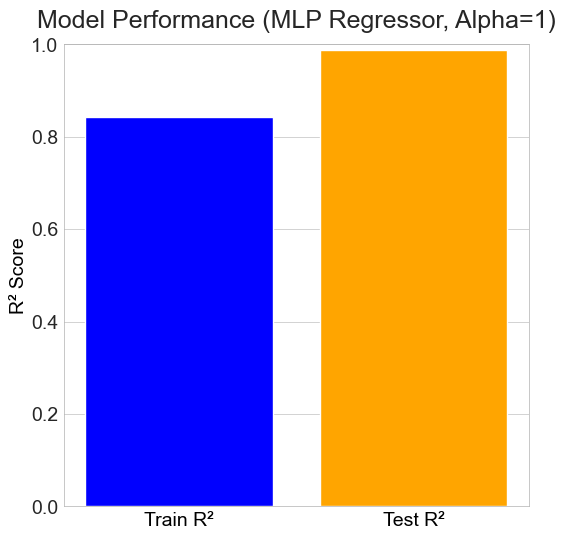

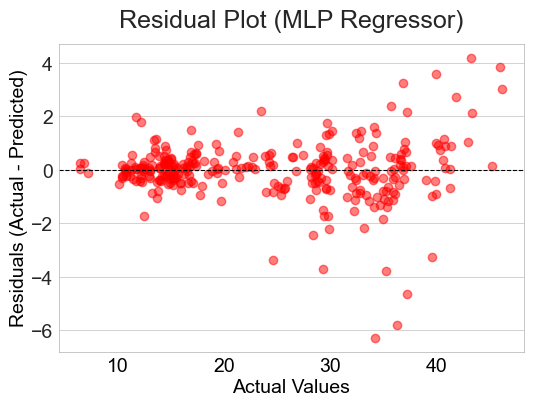

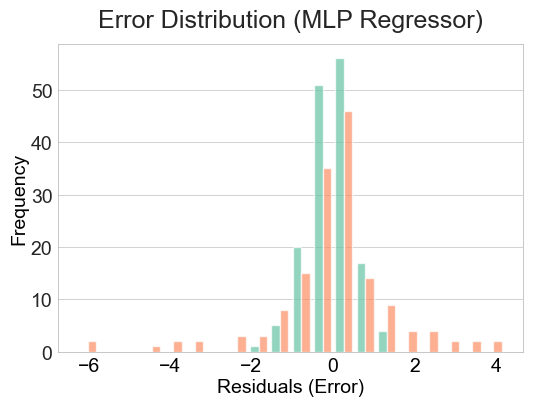

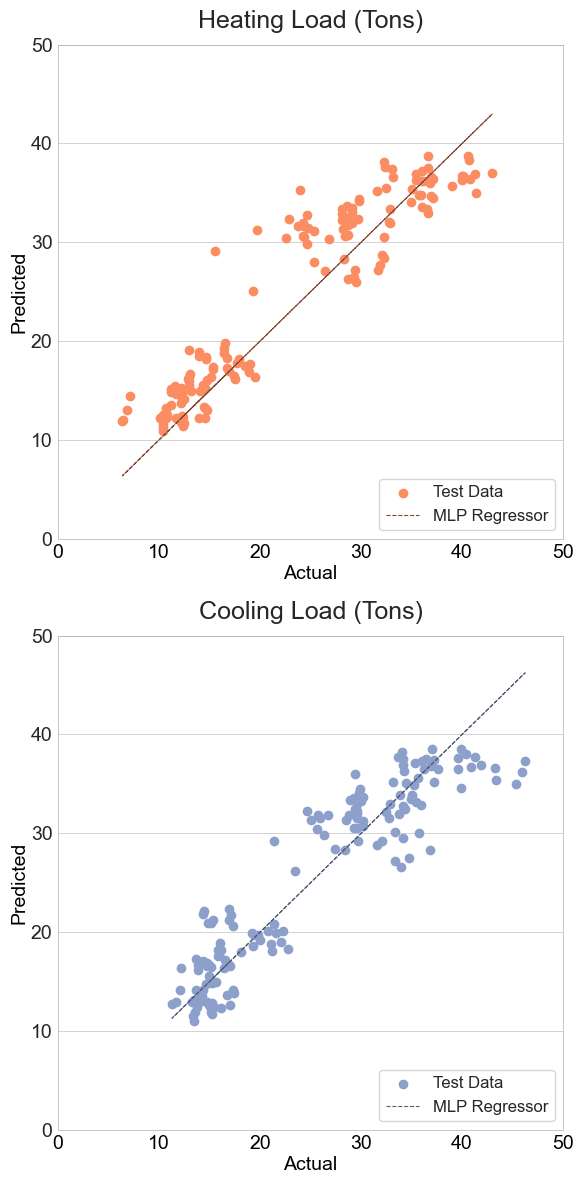

In [70]:
nn1 = nn(X_train, X_test, Y_train, Y_test,  ML_label="MLP Regressor", 
            degree_label="N/A", alpha_label=1, scaling="N/A", iterations=2000)
results_df = pd.concat([results_df,pd.DataFrame(nn1)])

In [71]:
results_df

Algorithm  Feature Scaling Degree   Alpha   R²-Test  R²-Train  \
0  Linear Regression              N/A    N/A     N/A  0.902441  0.901032   
0  Linear Regression    MinMax Scaler    N/A     N/A  0.902702  0.901495   
0  Linear Regression  Standard Scaler    N/A     N/A  0.902705  0.901493   
0  Linear Regression             None      1     N/A  0.902532  0.901493   
0  Linear Regression             None      2     N/A  0.956110  0.965971   
0  Linear Regression             None      3     N/A  0.976356  0.979002   
0  Linear Regression             None      4     N/A  0.987044  0.992931   
0  Linear Regression             None      5     N/A  0.984483  0.995675   
0  Linear Regression             None      6     N/A  0.975513  0.996154   
0   Ridge Regression             None    N/A    0.01  0.902510  0.901404   
0   Ridge Regression             None    N/A     0.1  0.900451  0.899663   
0   Ridge Regression             None    N/A       1  0.897867  0.896688   
0   Ridge Regression             None    N/A      10  0.887856  0.882815   
0   Lasso Regression             None    N/A   0.001  0.902479  0.901397   
0   Lasso Regression             None    N/A    0.01  0.896991  0.896440   
0   Lasso Regression             None    N/A     0.1  0.892025  0.889897   
0   Lasso Regression             None    N/A       1  0.783136  0.784354   
0   Lasso Regression             None    N/A      10  0.780134  0.781874   
0      MLP Regressor              N/A    N/A  0.0001  0.812676  0.793870   
0      MLP Regressor              N/A    N/A   0.001  0.875954  0.868466   
0      MLP Regressor              N/A    N/A    0.01  0.798651  0.759315   
0      MLP Regressor              N/A    N/A       1  0.858437  0.843484   

   Mean Absolute Error (MAE)  Root Mean Squared Error (RMSE)  
0                   2.194482                        3.090519  
0                   2.189464                        3.086095  
0                   2.188684                        3.085987  
0                   2.192150                        3.088813  
0                   1.628259                        2.051058  
0                   1.019444                        1.487525  
0                   0.678858                        1.103066  
0                   0.724522                        1.204818  
0                   0.821553                        1.511052  
0                   2.191319                        3.089218  
0                   2.235795                        3.121970  
0                   2.302976                        3.162179  
0                   2.448659                        3.315368  
0                   2.192043                        3.089710  
0                   2.316425                        3.175763  
0                   2.374533                        3.250371  
0                   3.349532                        4.613666  
0                   3.357177                        4.646660  
0                   3.182408                        4.291436  
0                   2.721561                        3.484429  
0                   3.575849                        4.432086  
0                   2.929645                        3.734145

In [72]:
results_df.to_excel('res.xlsx')

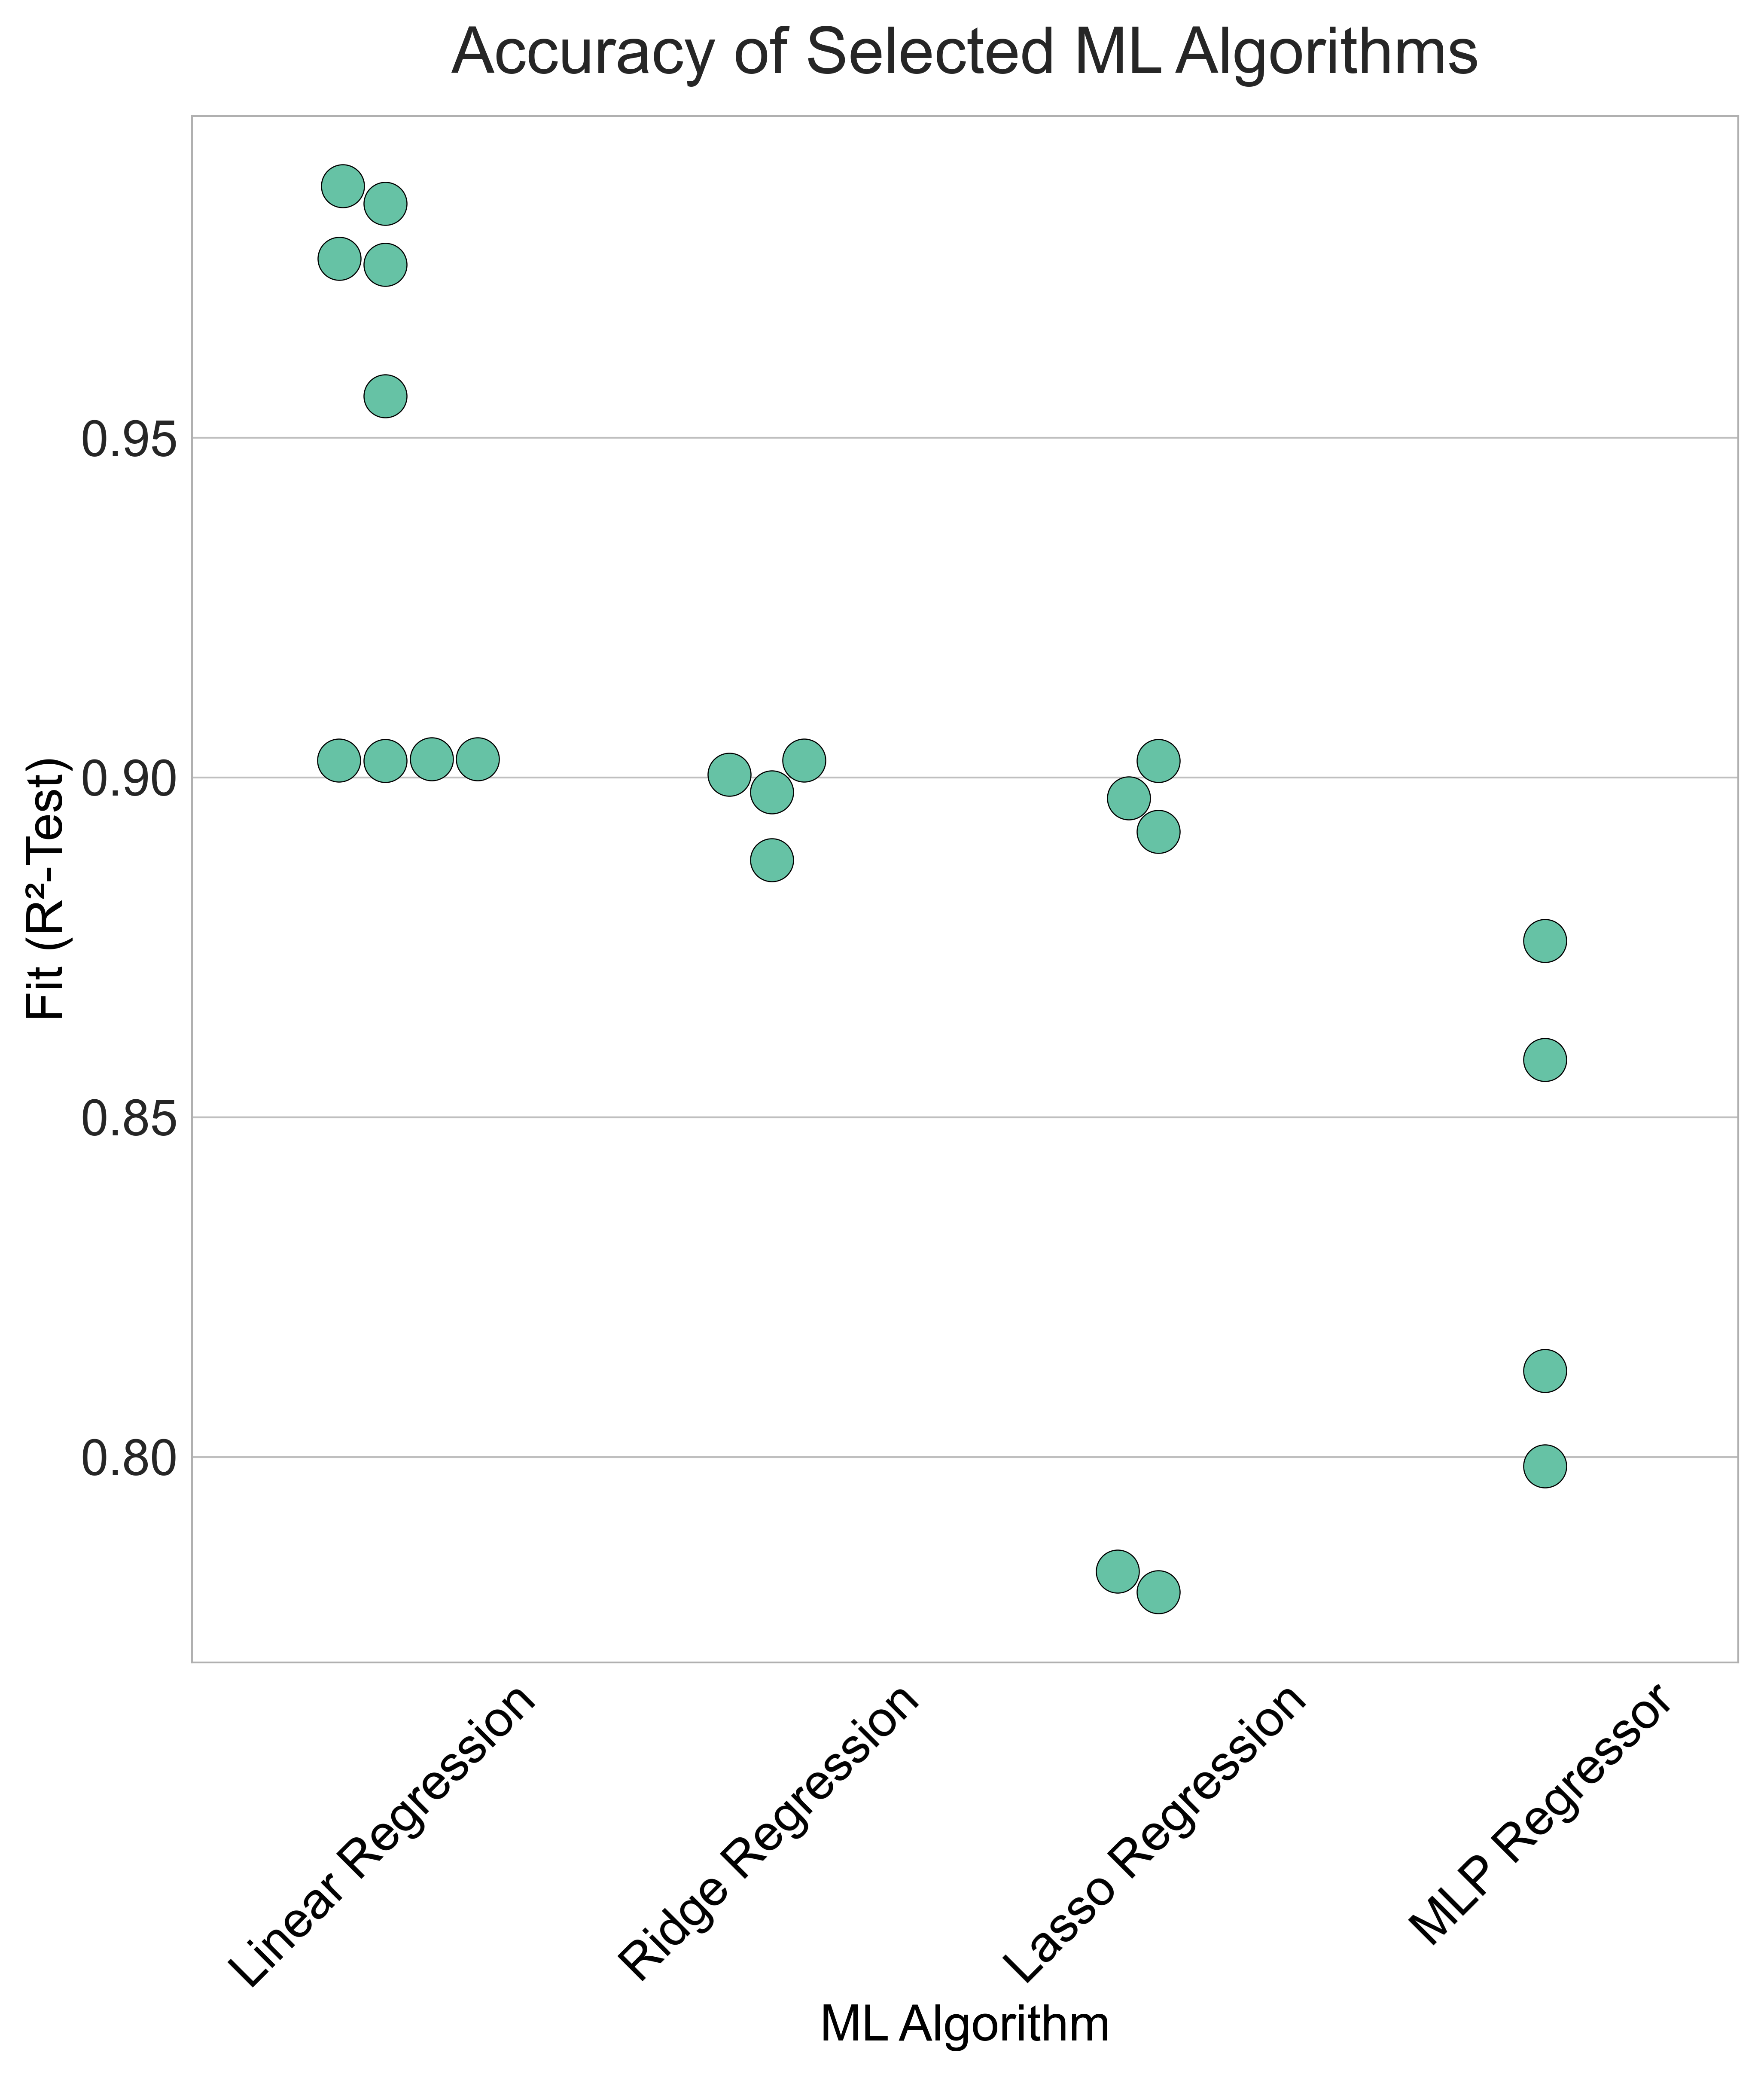

In [73]:

fig = plt.figure(figsize=(6,6), dpi=600)

ax = plt.axes((0,0,1,1))

sns.swarmplot(
             x=results_df['Algorithm'], 
             y=	results_df['R²-Test'],
            #stat='percent', 
             #color ='#b7cbba',
             #hue = results_df['Balancing Strategy'],
             edgecolor="black",
             linewidth=0.3,
              s=12,
              marker='o'
            )


#sns.move_legend(ax, loc='best')

plt.ylabel('Fit (R²-Test)')
plt.xlabel('ML Algorithm')
plt.xticks(rotation=45)

#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

plt.title('Accuracy of Selected ML Algorithms') 

plt.show()

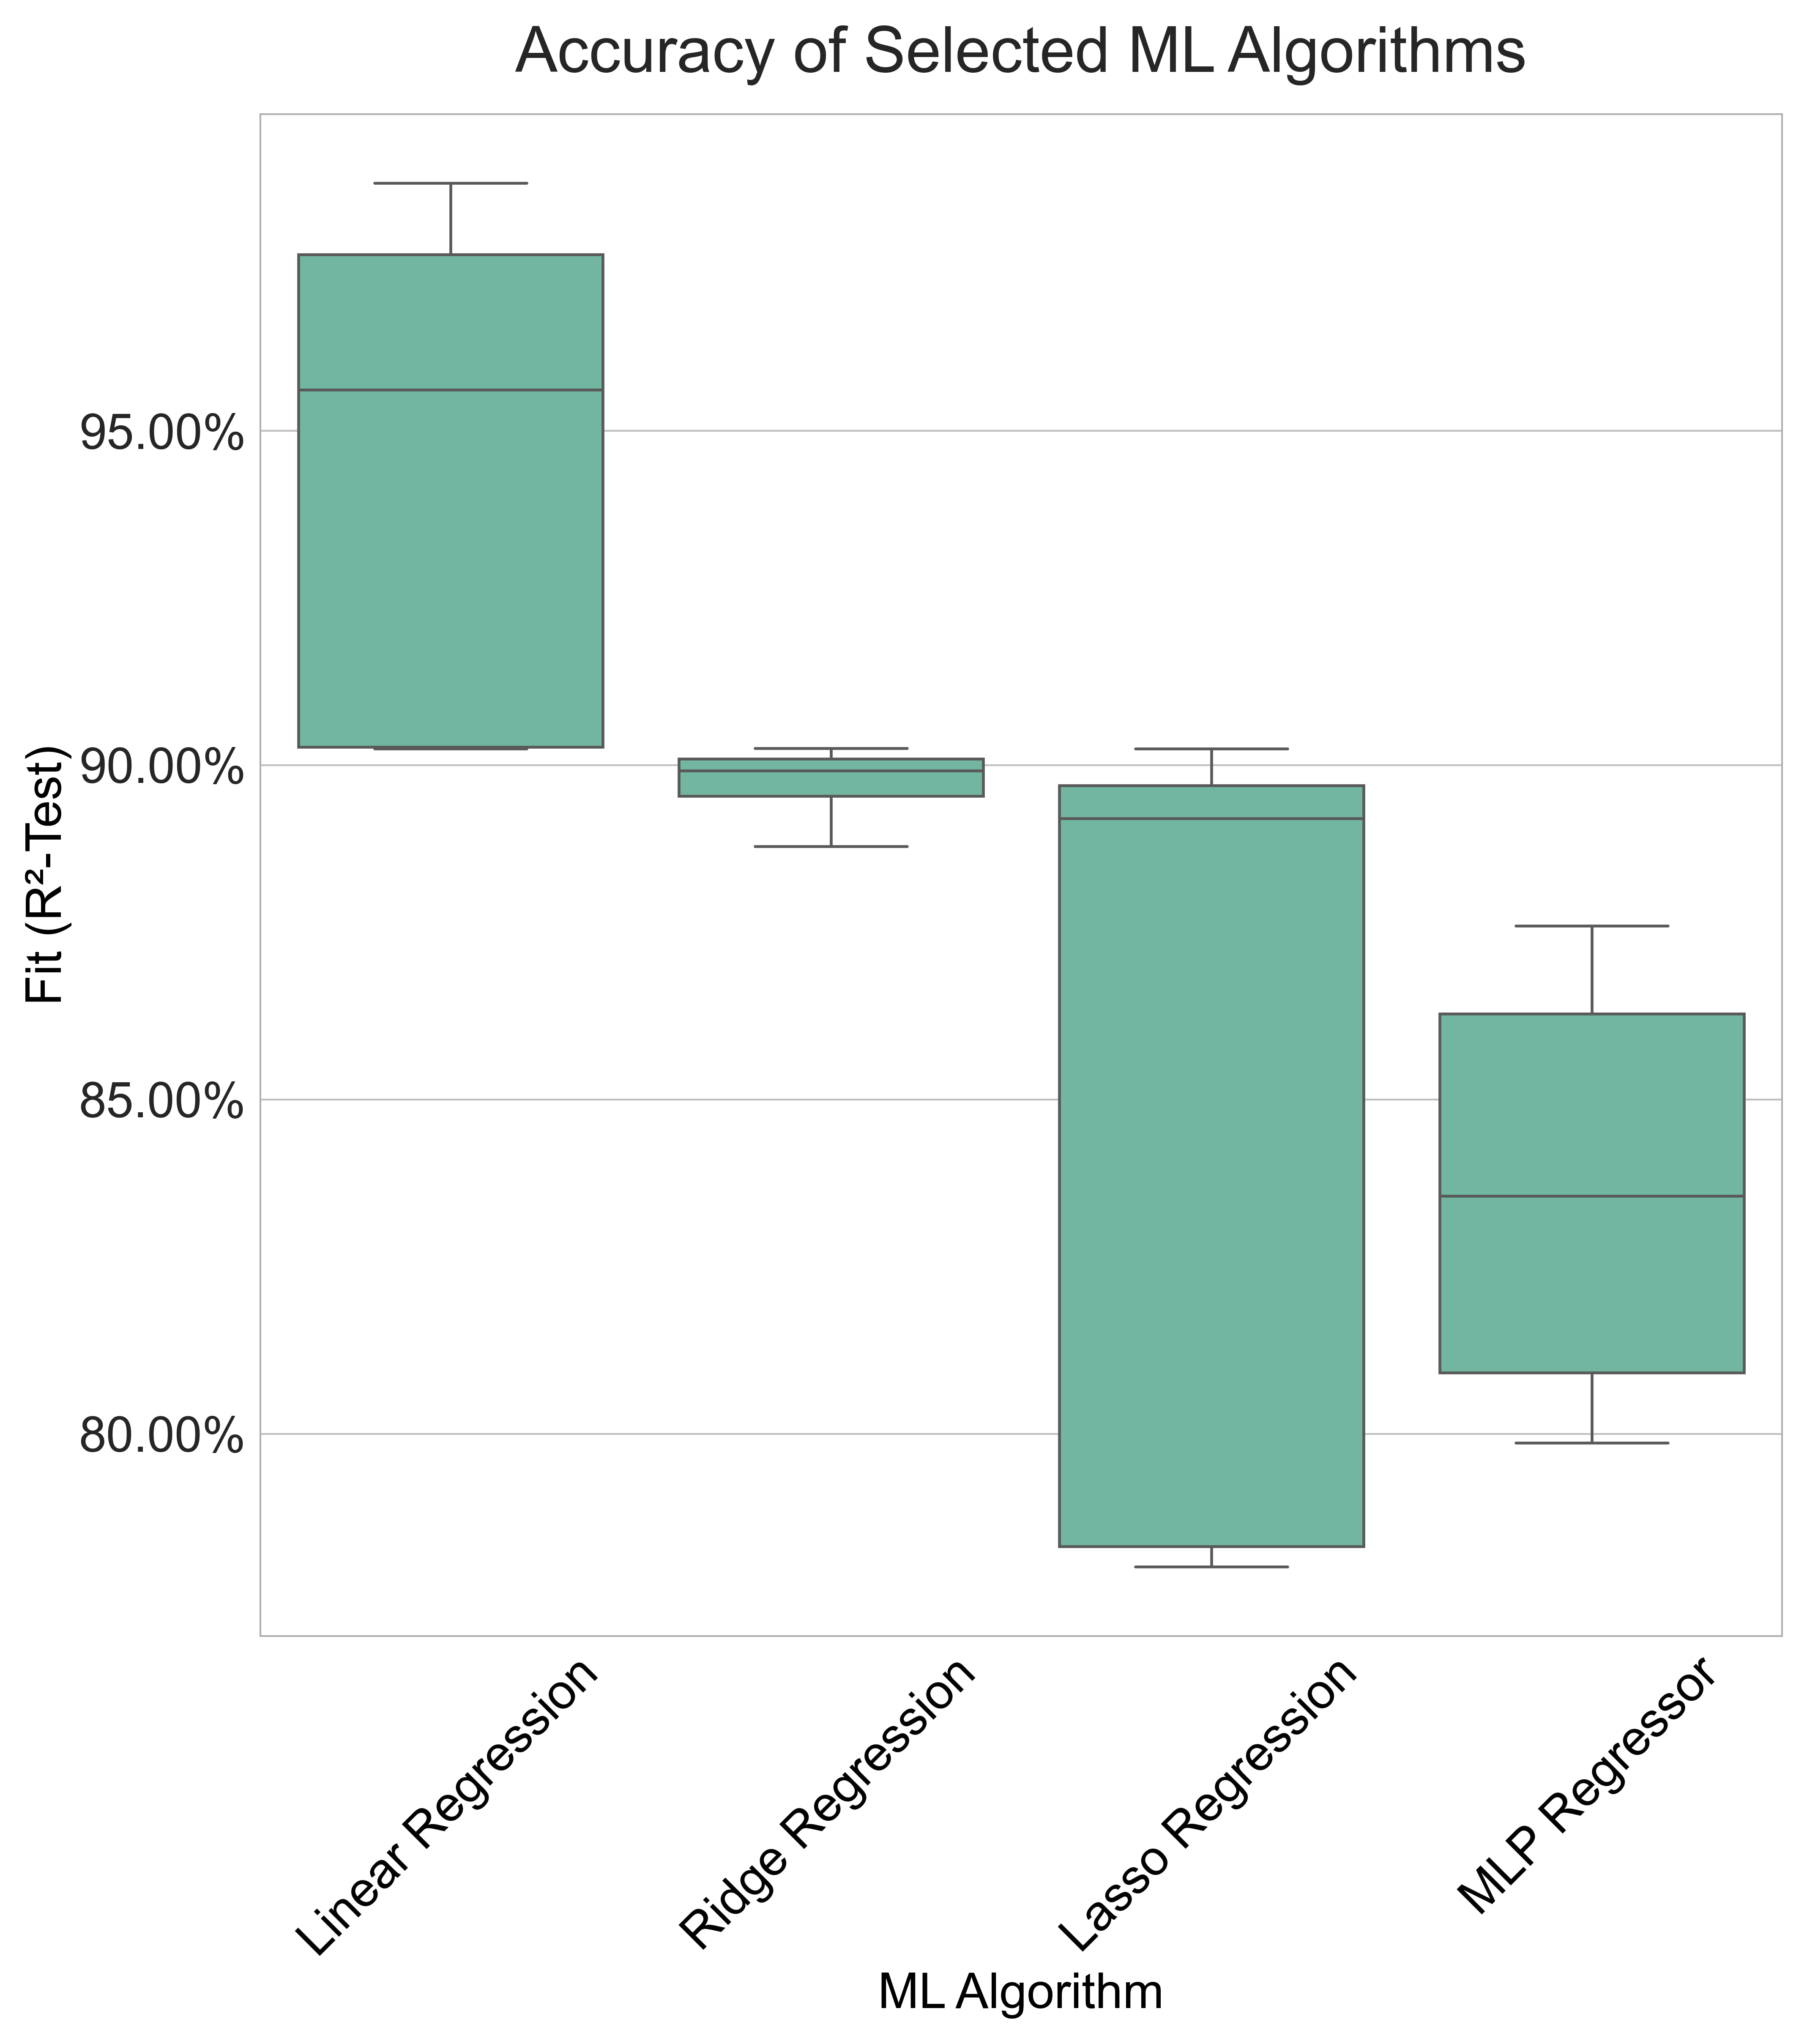

In [74]:

fig = plt.figure(figsize=(6,6), dpi=600)

ax = plt.axes((0,0,1,1))

sns.boxplot(
             x=results_df['Algorithm'], 
             y=	results_df['R²-Test'],
            #stat='percent', 
             #color ='#b7cbba',
             #hue = results_df['Balancing Strategy'],
             #edgecolor="black",
             linewidth=0.8,
              #s=12,
              #marker='o'
            )


#sns.move_legend(ax, loc='best')

plt.ylabel('Fit (R²-Test)')
plt.xlabel('ML Algorithm')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

plt.title('Accuracy of Selected ML Algorithms') 

plt.show()

In [75]:
lin_r = results_df.loc[results_df['Algorithm']=='Linear Regression']

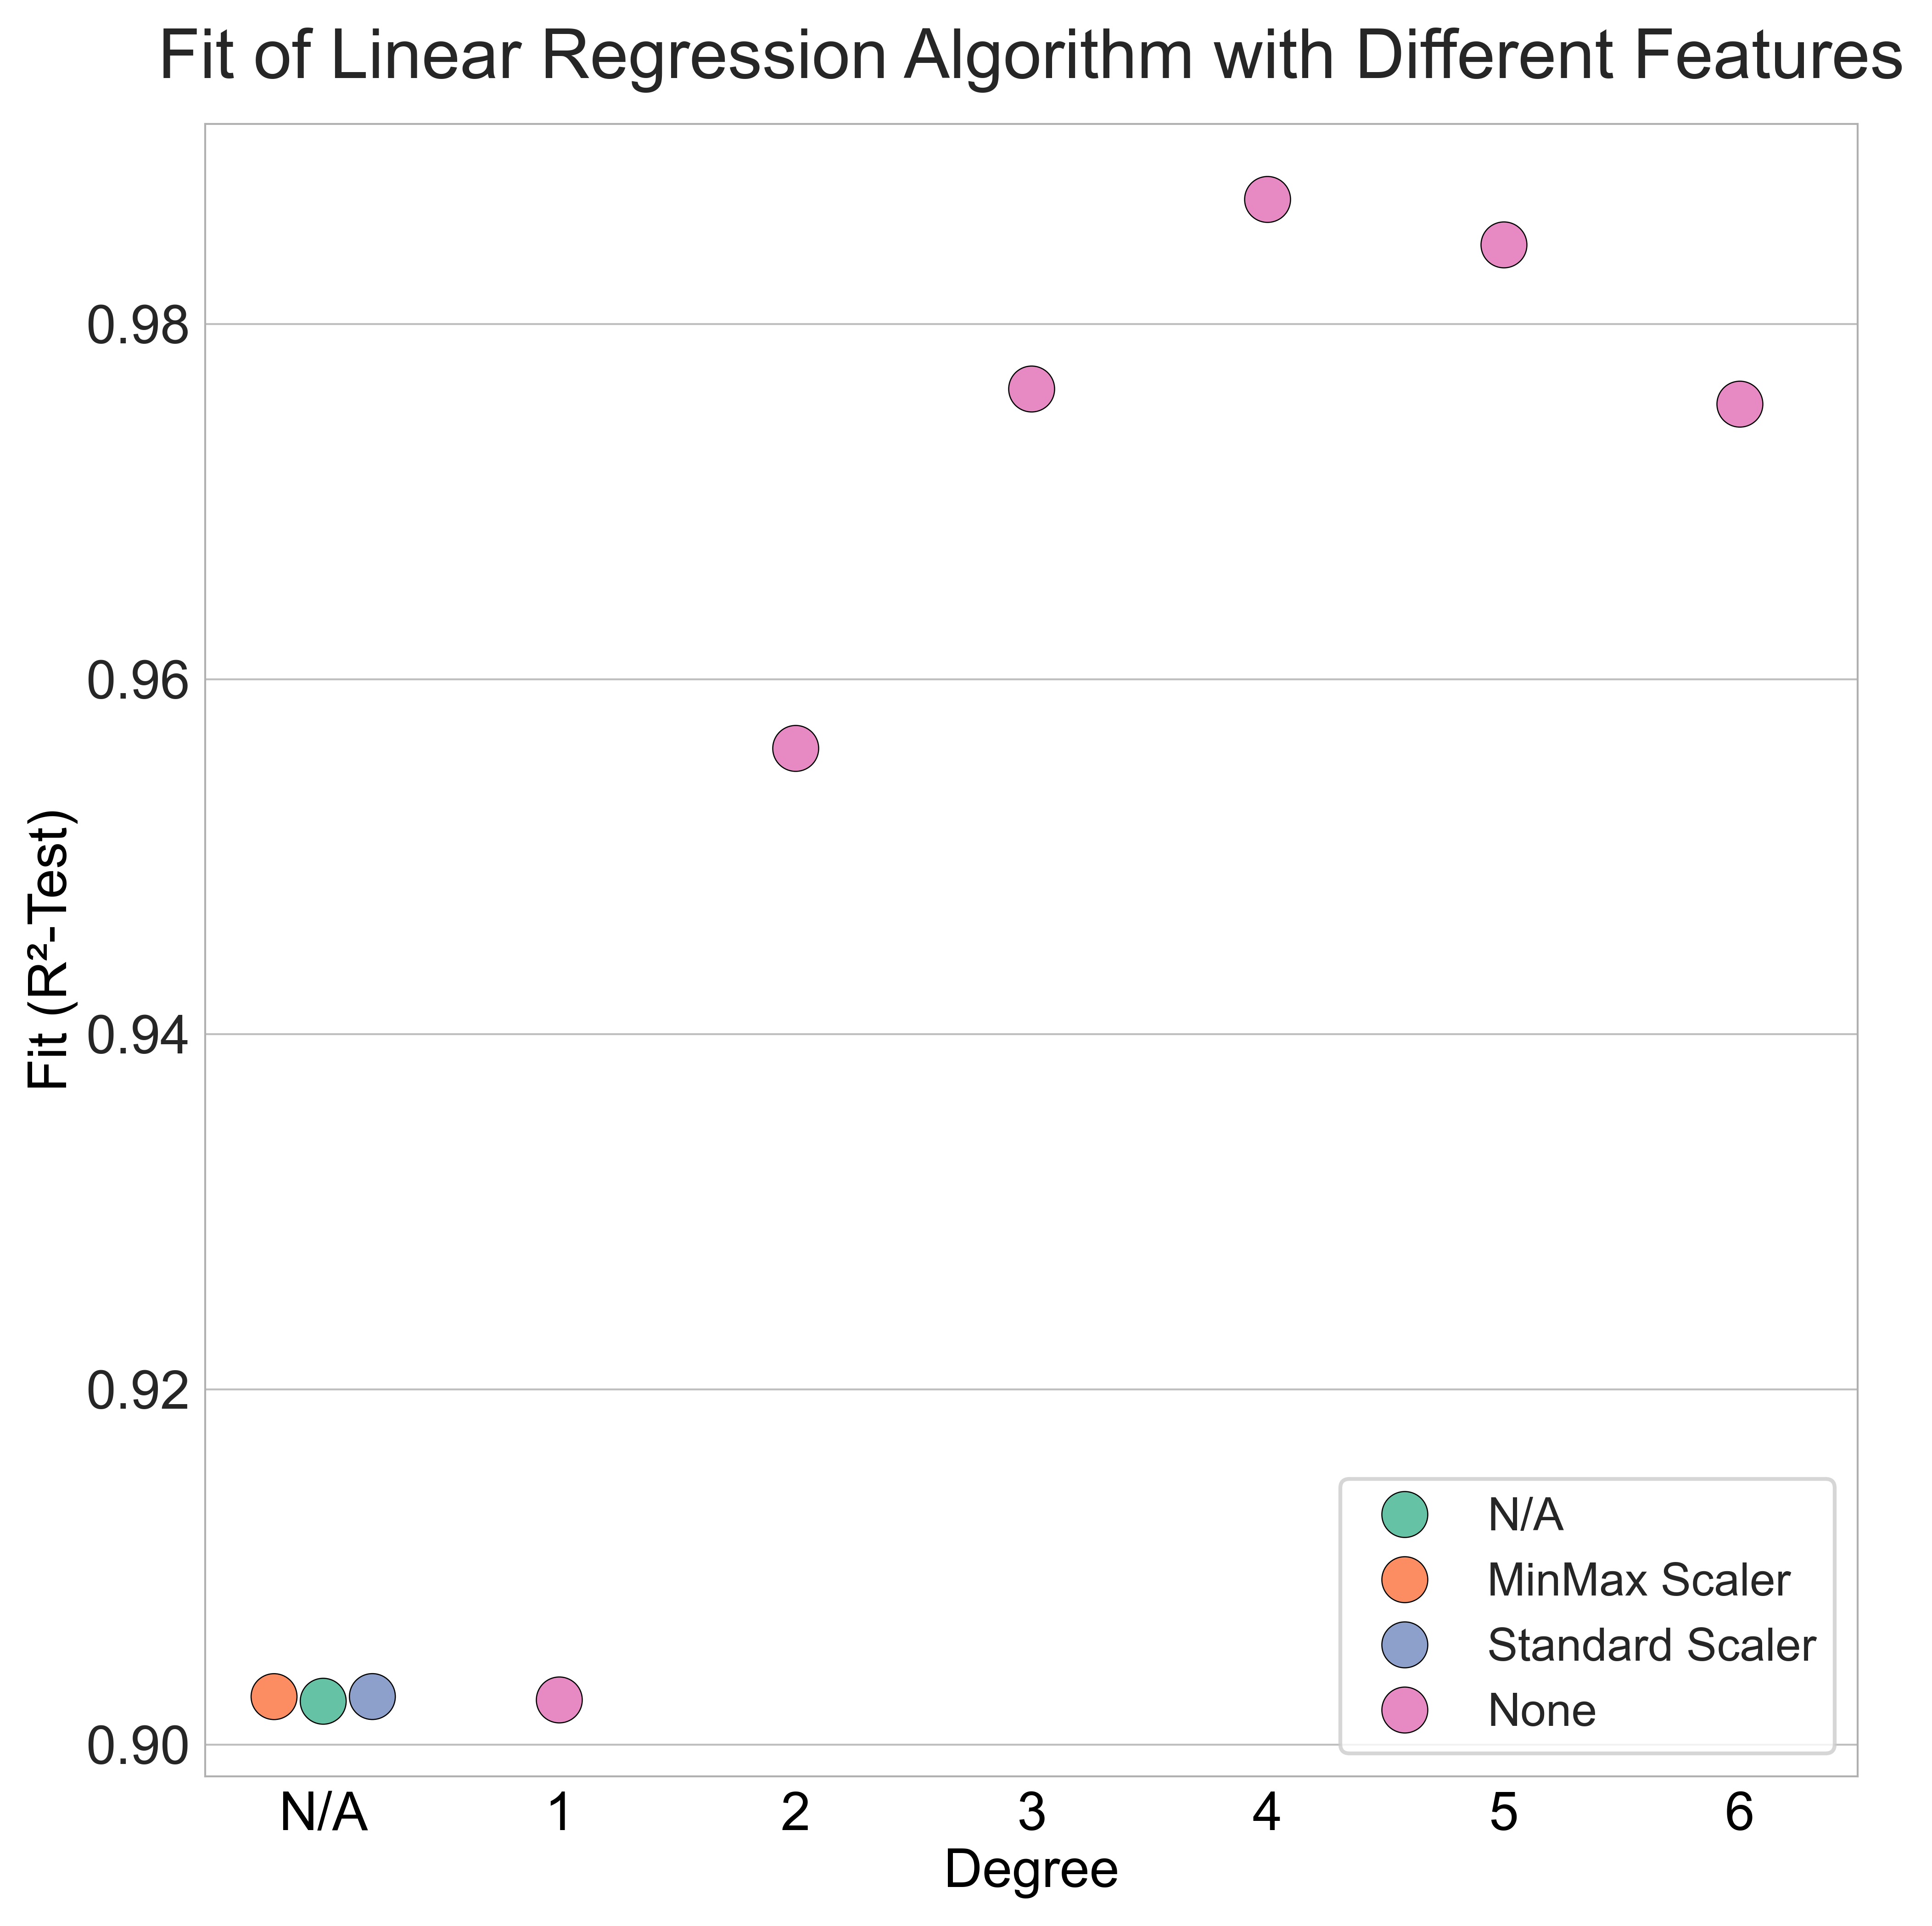

In [76]:

fig = plt.figure(figsize=(6,6), dpi=600)

ax = plt.axes((0,0,1,1))

sns.swarmplot(
             x=lin_r['Degree'], 
             y=	lin_r['R²-Test'],
            #stat='percent', 
             #color ='#b7cbba',
             hue = lin_r['Feature Scaling'],
             edgecolor="black",
             linewidth=0.3,
              s=12,
              marker='o'
            )


#sns.move_legend(ax, loc='best')


plt.xlabel('Degree')
plt.ylabel('Fit (R²-Test)')
plt.xticks()
plt.legend(loc='lower right')
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=2))

plt.title('Fit of Linear Regression Algorithm with Different Features') 

plt.show()